In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

pd.options.mode.chained_assignment = None
plt.style.use('classic')
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-darkgrid')
plt.style.use('dark_background')

import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
def plot_init():
    return plt.figure(figsize=(14,8))

In [3]:
portfolio = pd.read_json("data/portfolio.json", lines=True)
profile = pd.read_json("data/profile.json", lines=True)
transcript = pd.read_json("data/transcript.json", lines=True)

In [4]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [5]:
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [6]:
portfolio["reward"].unique()

array([10,  0,  5,  3,  2], dtype=int64)

In [7]:
portfolio["channels"]

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

In [8]:
portfolio["difficulty"].unique()

array([10,  0,  5, 20,  7], dtype=int64)

In [9]:
portfolio["duration"].unique()

array([ 7,  5,  4, 10,  3], dtype=int64)

In [10]:
portfolio["offer_type"].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [11]:
portfolio["id"].unique()

array(['ae264e3637204a6fb9bb56bc8210ddfd',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '3f207df678b143eea3cee63160fa8bed',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '5a8bc65990b245e5a138643cd4eb9837',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2906b810c7d4411798c6938adc9daaa5'], dtype=object)

In [12]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [13]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [14]:
profile[profile["gender"].isna()]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [15]:
profile.isna().sum()/len(profile)

gender              0.127941
age                 0.000000
id                  0.000000
became_member_on    0.000000
income              0.127941
dtype: float64

In [16]:
profile = profile.dropna()

In [17]:
profile["gender"].unique()

array(['F', 'M', 'O'], dtype=object)

In [18]:
profile["age"].unique()

array([ 55,  75,  68,  65,  58,  61,  26,  62,  49,  57,  40,  64,  78,
        42,  56,  33,  46,  59,  67,  53,  22,  96,  69,  20,  45,  54,
        39,  41,  79,  66,  29,  44,  63,  36,  76,  77,  30,  51,  27,
        73,  74,  70,  89,  50,  90,  60,  19,  72,  52,  18,  71,  83,
        43,  47,  32,  38,  34,  85,  48,  35,  82,  21,  24,  81,  25,
        37,  23, 100,  28,  84,  80,  87,  86,  94,  31,  88,  95,  93,
        91,  92,  98, 101,  97,  99], dtype=int64)

In [19]:
sorted(profile["id"].unique())[:10]

['0009655768c64bdeb2e877511632db8f',
 '0011e0d4e6b944f998e987f904e8c1e5',
 '0020c2b971eb4e9188eac86d93036a77',
 '0020ccbbb6d84e358d3414a3ff76cffd',
 '003d66b6608740288d6cc97a6903f4f0',
 '00426fe3ffde4c6b9cb9ad6d077a13ea',
 '004b041fbfe44859945daa2c7f79ee64',
 '004c5799adbf42868b9cff0396190900',
 '005500a7188546ff8a767329a2f7c76a',
 '0056df74b63b4298809f0b375a304cf4']

In [20]:

sorted(profile["became_member_on"].unique())[:10]

[20130729,
 20130730,
 20130731,
 20130801,
 20130802,
 20130803,
 20130804,
 20130805,
 20130806,
 20130807]

In [21]:
sorted(profile["income"].unique())[:10]

[30000.0,
 31000.0,
 32000.0,
 33000.0,
 34000.0,
 35000.0,
 36000.0,
 37000.0,
 38000.0,
 39000.0]

In [22]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [23]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [24]:
sorted(transcript["person"].unique())[:10]

['0009655768c64bdeb2e877511632db8f',
 '00116118485d4dfda04fdbaba9a87b5c',
 '0011e0d4e6b944f998e987f904e8c1e5',
 '0020c2b971eb4e9188eac86d93036a77',
 '0020ccbbb6d84e358d3414a3ff76cffd',
 '003d66b6608740288d6cc97a6903f4f0',
 '00426fe3ffde4c6b9cb9ad6d077a13ea',
 '004b041fbfe44859945daa2c7f79ee64',
 '004c5799adbf42868b9cff0396190900',
 '005500a7188546ff8a767329a2f7c76a']

In [25]:
transcript["event"].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [26]:
transcript["value"]

0         {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2         {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3         {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4         {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
                                ...                       
306529                      {'amount': 1.5899999999999999}
306530                                    {'amount': 9.53}
306531                                    {'amount': 3.61}
306532                      {'amount': 3.5300000000000002}
306533                                    {'amount': 4.05}
Name: value, Length: 306534, dtype: object

In [27]:
transcript["time"].unique()

array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
       234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306,
       312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384,
       390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462,
       468, 474, 480, 486, 492, 498, 504, 510, 516, 522, 528, 534, 540,
       546, 552, 558, 564, 570, 576, 582, 588, 594, 600, 606, 612, 618,
       624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696,
       702, 708, 714], dtype=int64)

In [28]:
profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


Text(0.5, 0, 'Income')

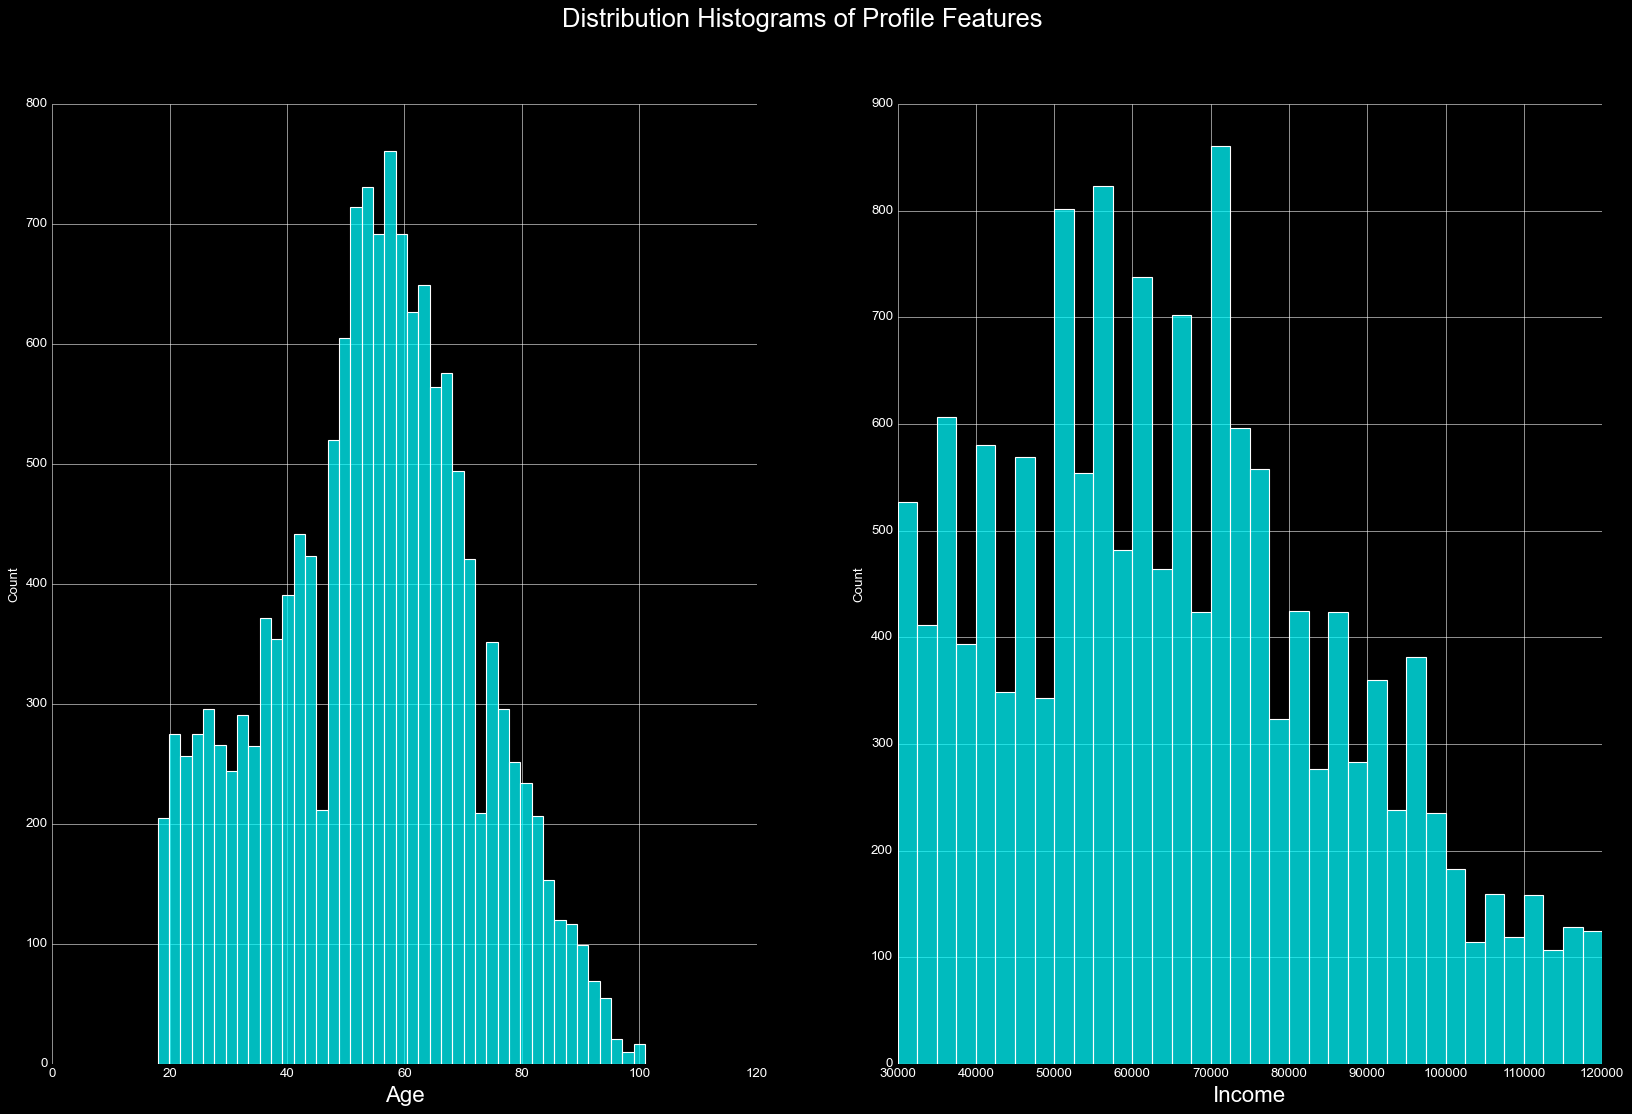

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(25,15))
fig.suptitle("Distribution Histograms of Profile Features", size=23)
f1 = sns.histplot(profile["age"], ax=axs[0], color="#00fbff")
f1.set_xlabel("Age", size=20)
f2 = sns.histplot(profile["income"], ax=axs[1], color="#00fbff")
f2.set_xlabel("Income", size=20)

Text(0.5, 0, 'Income')

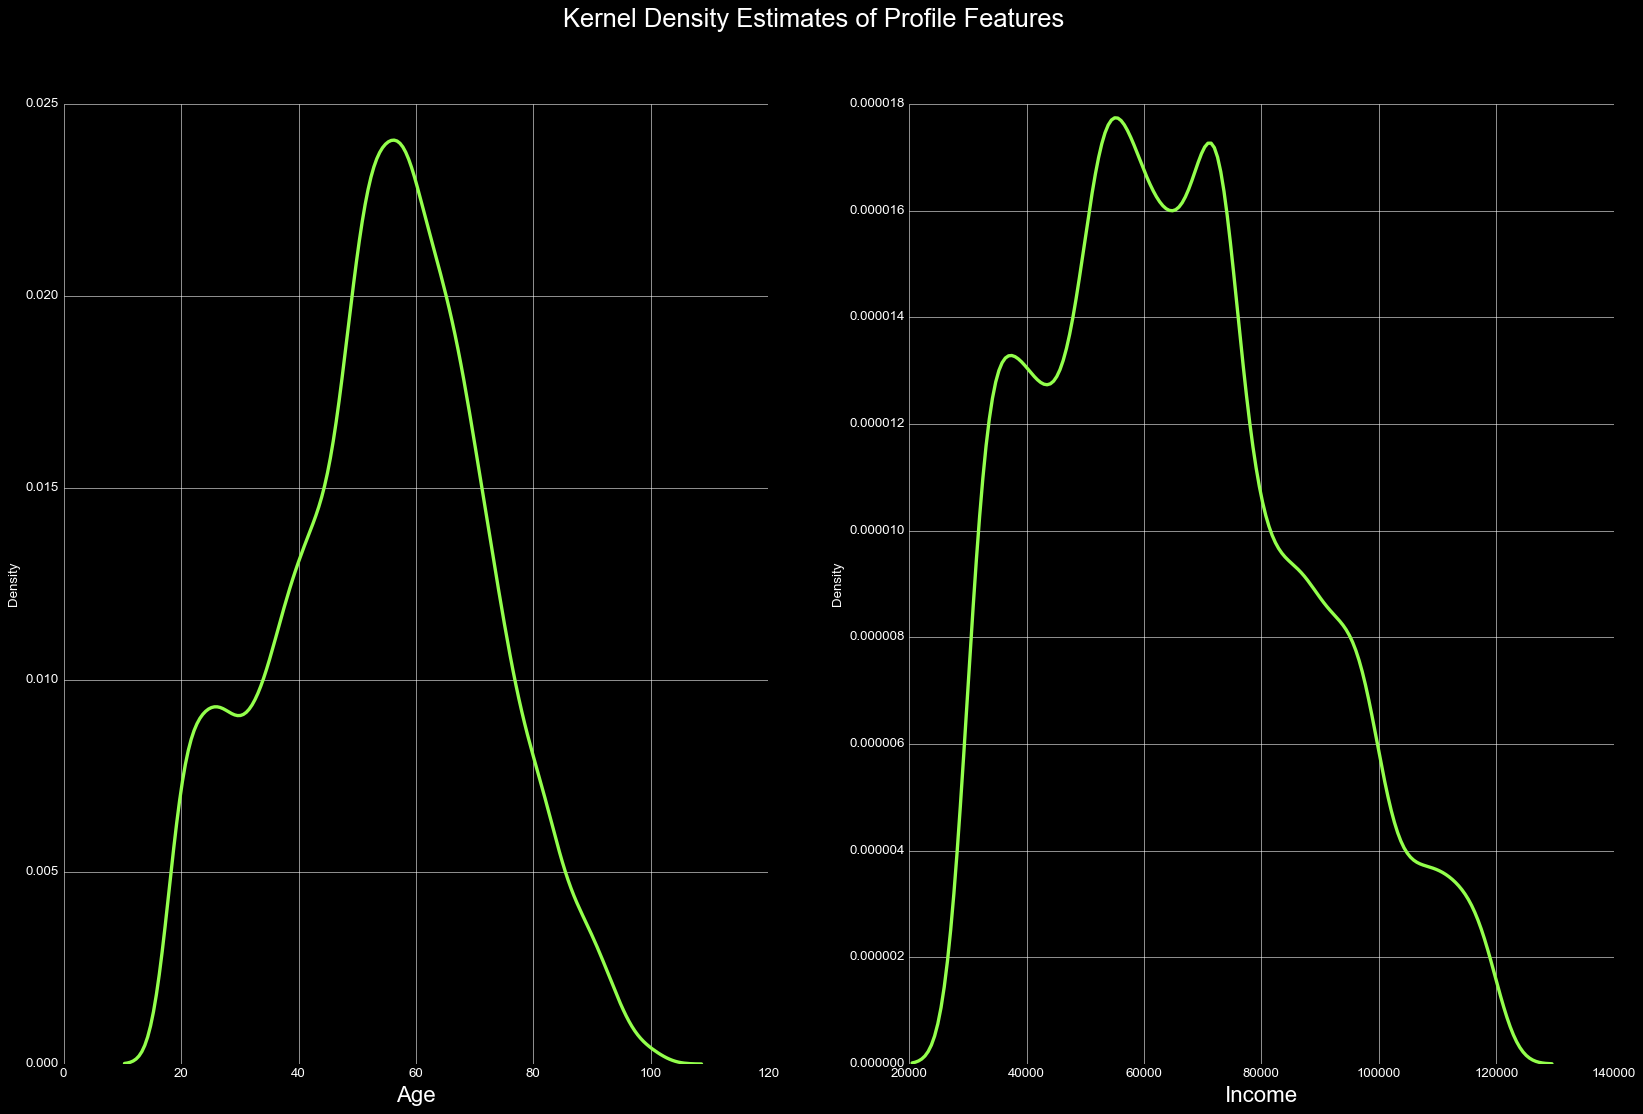

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(25,15))
fig.suptitle("Kernel Density Estimates of Profile Features", size=23)
f1 = sns.kdeplot(profile["age"], ax=axs[0], color="#93FF4C",linewidth=3)
f1.set_xlabel("Age", size=20)
f2 = sns.kdeplot(profile["income"], ax=axs[1], color="#93FF4C", linewidth=3)
f2.set_xlabel("Income", size=20)

Text(0.5, 1.0, 'Distribution of Gender category')

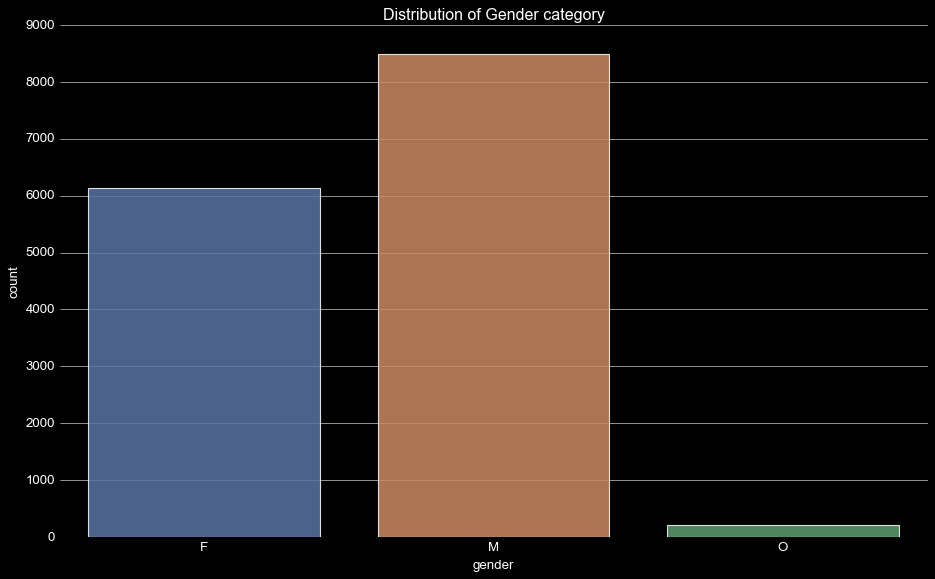

In [31]:
plot_init()
sns.countplot(x=profile["gender"], palette="deep", alpha=.85)
plt.title("Distribution of Gender category")

<AxesSubplot:title={'center':'Distribution of became_member_on'}, xlabel='became_member_on', ylabel='Count'>

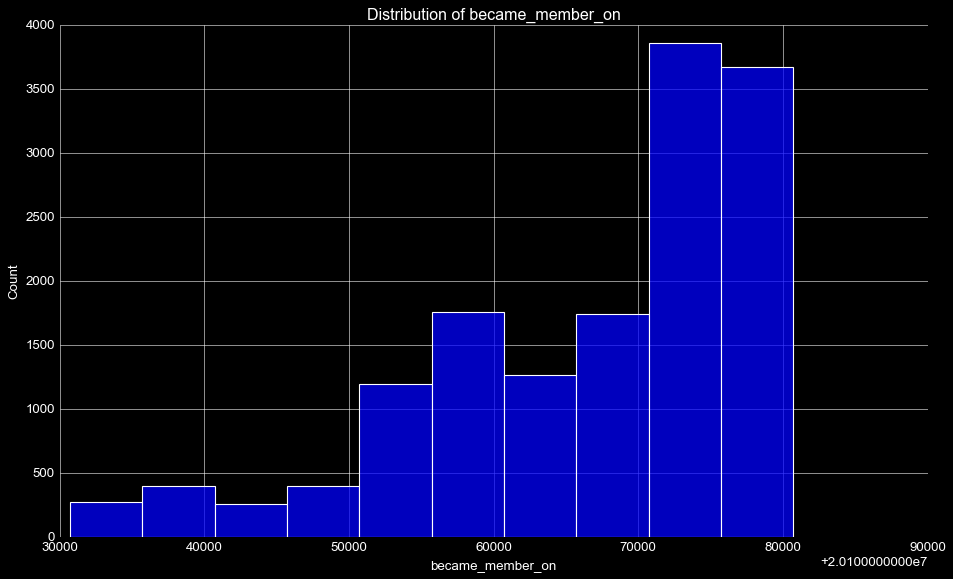

In [32]:
plot_init()
plt.title("Distribution of became_member_on")
sns.histplot(profile["became_member_on"], binwidth=5000)

<AxesSubplot:title={'center':'Scatter Plot Income/Age relationship'}, xlabel='age', ylabel='income'>

<Figure size 1120x640 with 0 Axes>

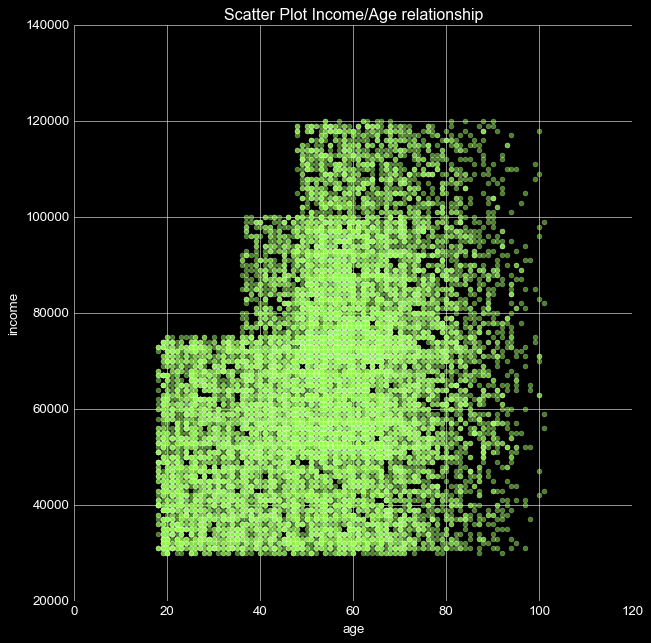

In [33]:
plot_init()
plt.figure(figsize=(9,9))
plt.title("Scatter Plot Income/Age relationship")
sns.scatterplot(x="age",y="income",color='#93FF4C',data=profile, alpha=.50)

<AxesSubplot:title={'center':'Kernel Density Estimate Income/Age relationship'}, xlabel='age', ylabel='income'>

<Figure size 1120x640 with 0 Axes>

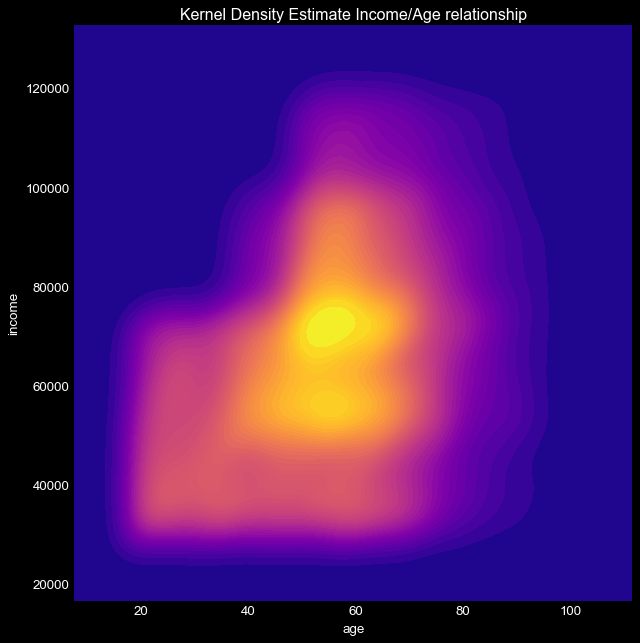

In [34]:
plot_init()
plt.figure(figsize=(9,9))
plt.title("Kernel Density Estimate Income/Age relationship")
sns.kdeplot(x="age",y="income",data=profile, cmap="plasma", fill=True,
        thresh=0, levels=50, legend=True)

In [35]:
np.corrcoef(profile["age"],profile["income"])

array([[1.        , 0.30670279],
       [0.30670279, 1.        ]])

<AxesSubplot:title={'center':'Polynomial Fit Income/Age relationship'}, xlabel='age', ylabel='income'>

<Figure size 1120x640 with 0 Axes>

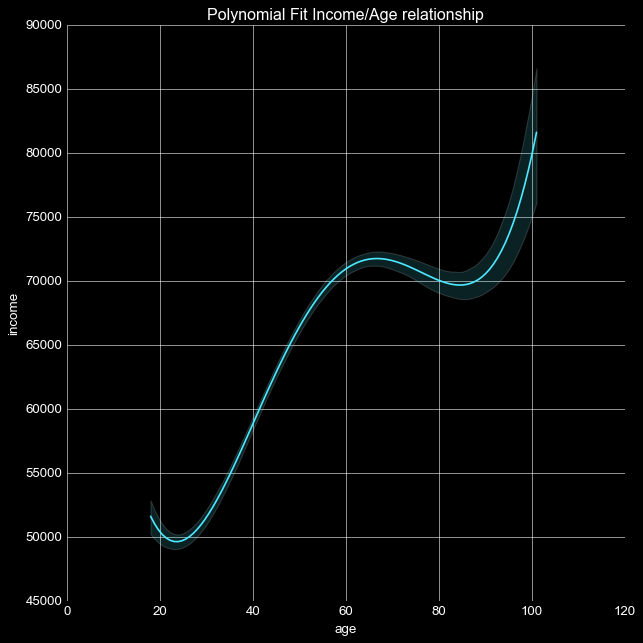

In [36]:
plot_init()
plt.figure(figsize=(9,9))
plt.title("Polynomial Fit Income/Age relationship")
sns.regplot(x="age",y="income", order=4, data=profile, scatter=False, color="#4CE9FF")

Text(0.5, 8.844444444444436, 'Income')

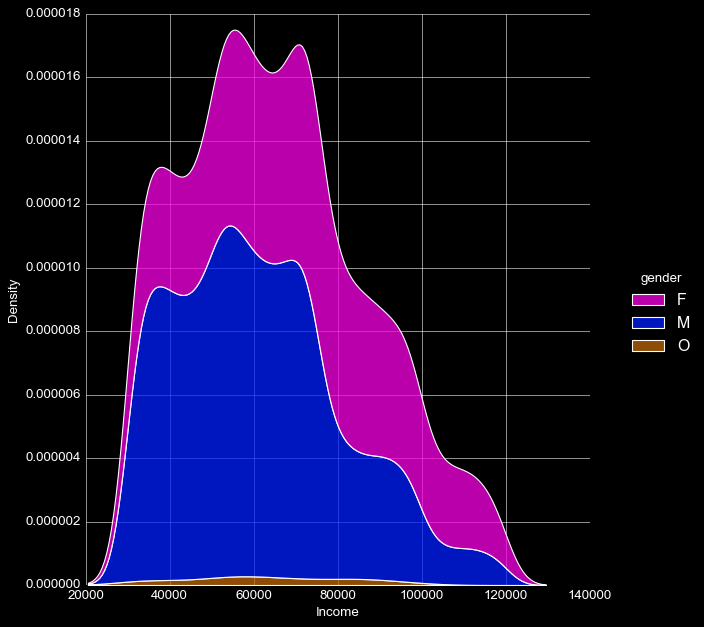

In [37]:
d = sns.displot(x="income", multiple="stack", hue="gender",data=profile, height=8, kind="kde", palette=["#fa00e5","#001eff","#bf6708"])
axes = d.axes.flatten()
axes[0].set_xlabel('Income')

Text(0.5, 8.844444444444436, 'Age')

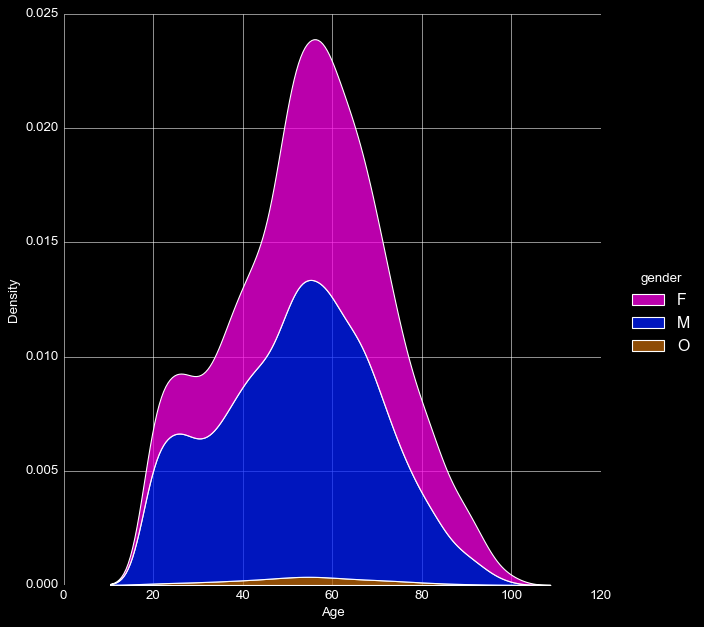

In [38]:
d = sns.displot(x="age", multiple="stack", hue="gender",data=profile, height=8, kind="kde", palette=["#fa00e5","#001eff","#bf6708"])
axes = d.axes.flatten()
axes[0].set_xlabel('Age')

Text(0.5, 8.844444444444436, 'Age')

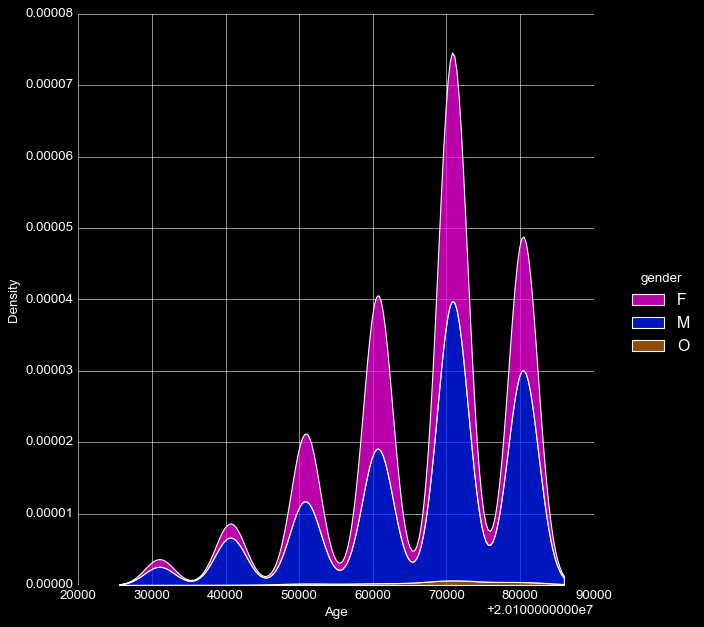

In [39]:
d = sns.displot(x="became_member_on", multiple="stack", hue="gender",data=profile, height=8, kind="kde", palette=["#fa00e5","#001eff","#bf6708"])
axes = d.axes.flatten()
axes[0].set_xlabel('Age')

In [40]:
age_cat_array = []
for i in range(len(profile)):
    retr_age = profile["age"].iloc[i]
    if retr_age>=18 and retr_age<=25:
        age_cat_array.append("18-25")
    elif retr_age>=26 and retr_age<=30:
        age_cat_array.append("26-30")
    elif retr_age>=31 and retr_age<=40:
        age_cat_array.append("31-40")
    elif retr_age>=41 and retr_age<=50:
        age_cat_array.append("41-50")
    elif retr_age>=51 and retr_age<=59:
        age_cat_array.append("51-59")
    elif retr_age>=60:
        age_cat_array.append(">60")

In [41]:
profile["age_group"] = age_cat_array
profile["income"].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

In [42]:
income_cat_array = []
for i in range(len(profile)):
    retr_inc = profile["income"].iloc[i]
    if retr_inc>=30000 and retr_inc<=45000:
        income_cat_array.append("30000-45000")
    elif retr_inc>=46000 and retr_inc<=55000:
        income_cat_array.append("46000-55000")
    elif retr_inc>=56000 and retr_inc<=65000:
        income_cat_array.append("56000-65000")
    elif retr_inc>=66000 and retr_inc<=79000:
        income_cat_array.append("66000-75000")
    elif retr_inc>=80000:
        income_cat_array.append(">80000")
    else:
        print(f"ERROR: on value {retr_inc} position {i}")
profile["income_group"] = income_cat_array
profile

,gender,age,id,became_member_on,income,age_group,income_group
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,51-59,>80000
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,>60,>80000
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,>60,66000-75000
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,>60,46000-55000
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,51-59,46000-55000
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,41-50,46000-55000
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,>60,66000-75000
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,41-50,66000-75000
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,>60,46000-55000


In [43]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


<AxesSubplot:title={'center':'Distribution of Offer Type'}, xlabel='offer_type', ylabel='count'>

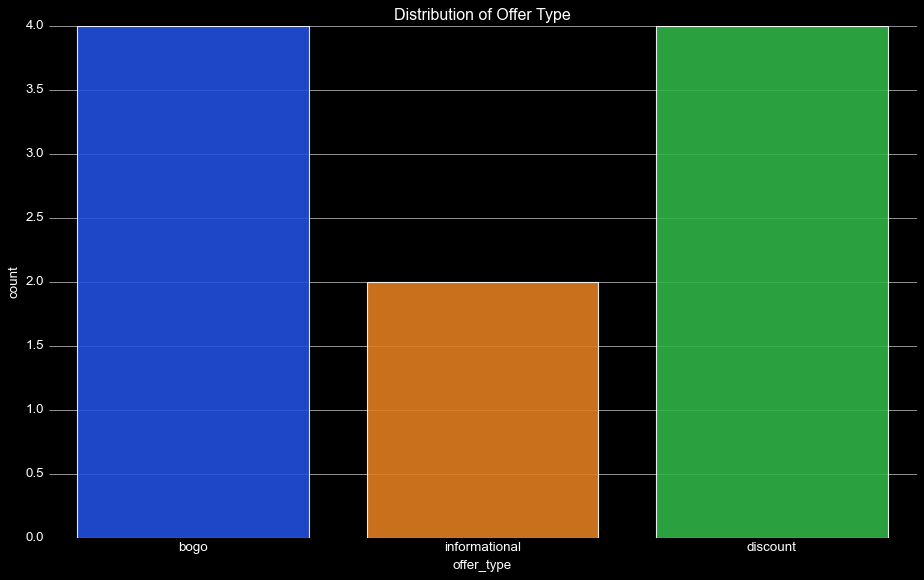

In [44]:
plot_init()
plt.title("Distribution of Offer Type")
sns.countplot(x=portfolio["offer_type"], palette="bright", alpha=.9)

<AxesSubplot:title={'center':'Distribution of Offer Duration (days)'}, xlabel='duration', ylabel='count'>

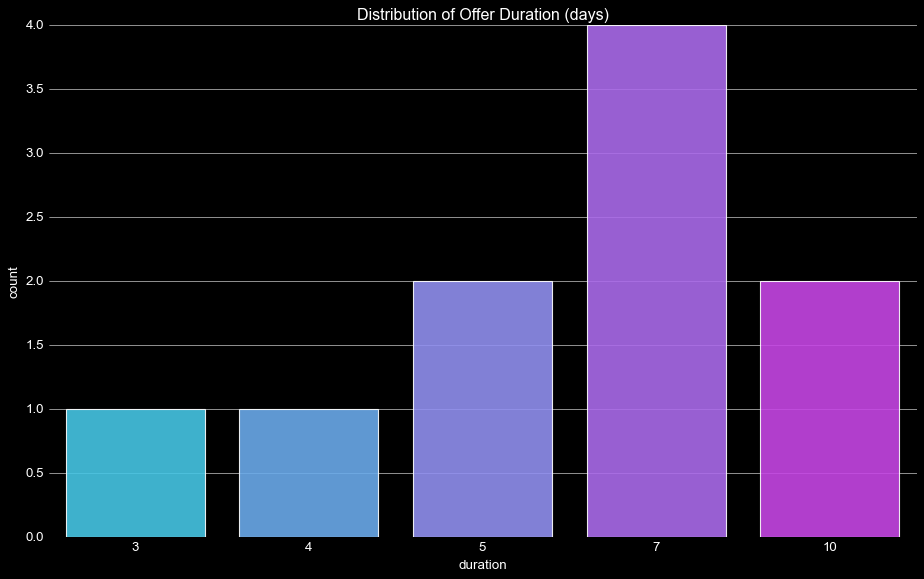

In [45]:
plot_init()
plt.title("Distribution of Offer Duration (days)")
sns.countplot(x=portfolio["duration"], palette="cool", alpha=.9)

<AxesSubplot:title={'center':'Distribution of Offer Difficulty'}, xlabel='difficulty', ylabel='count'>

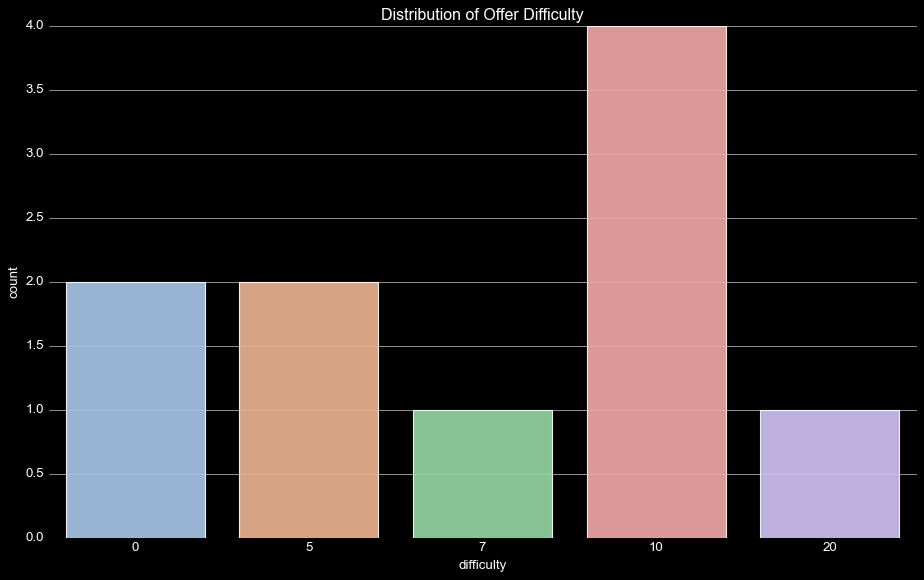

In [46]:
plot_init()
plt.title("Distribution of Offer Difficulty")
sns.countplot(x=portfolio["difficulty"], palette="pastel", alpha=.9)

<AxesSubplot:title={'center':'Distribution of Offer Reward'}, xlabel='reward', ylabel='count'>

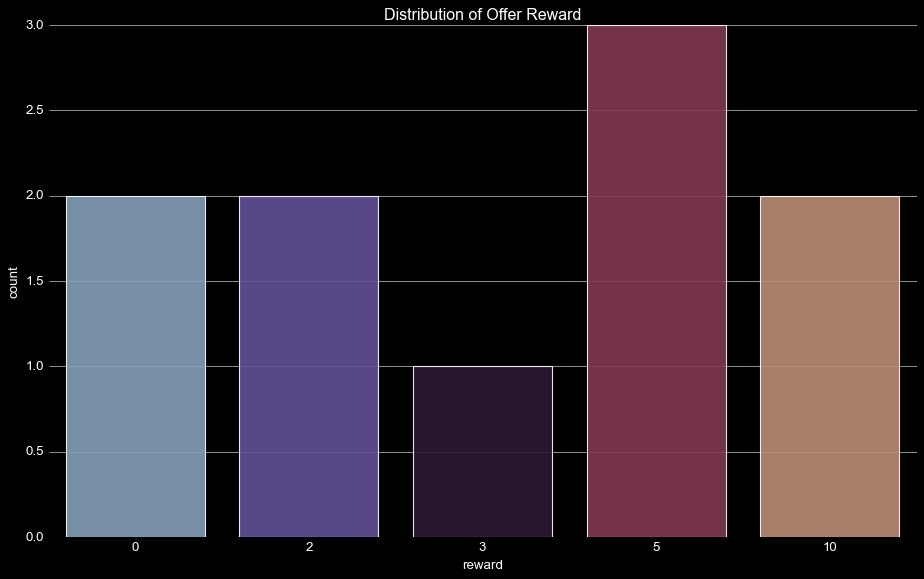

In [47]:
plot_init()
plt.title("Distribution of Offer Reward")
sns.countplot(x=portfolio["reward"], palette="twilight", alpha=.9)

<AxesSubplot:title={'center':'difficulty/reward relationship'}, xlabel='difficulty', ylabel='reward'>

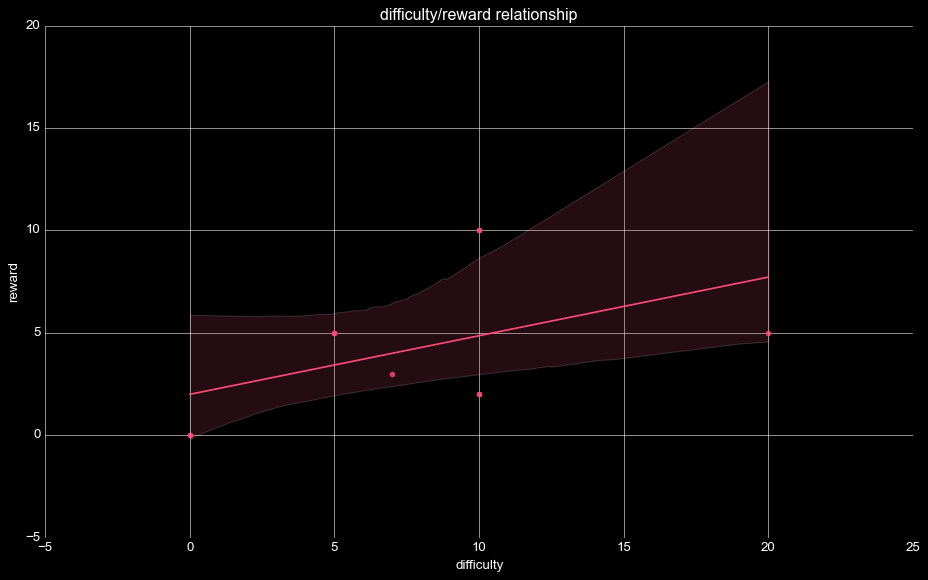

In [48]:
plot_init()
plt.title("difficulty/reward relationship")
sns.regplot(x="difficulty",y="reward", data=portfolio, color="#FF4C7A")

<AxesSubplot:title={'center':'difficulty/duration relationship'}, xlabel='difficulty', ylabel='duration'>

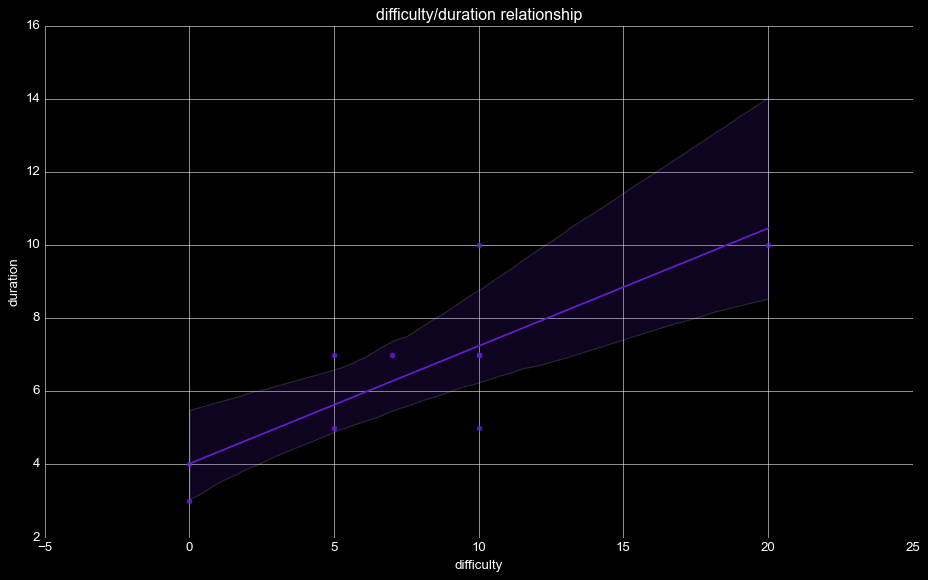

In [49]:
plot_init()
plt.title("difficulty/duration relationship")
sns.regplot(x="difficulty",y="duration", data=portfolio, color="#661ED5")

<AxesSubplot:title={'center':'duration/reward relationship'}, xlabel='duration', ylabel='reward'>

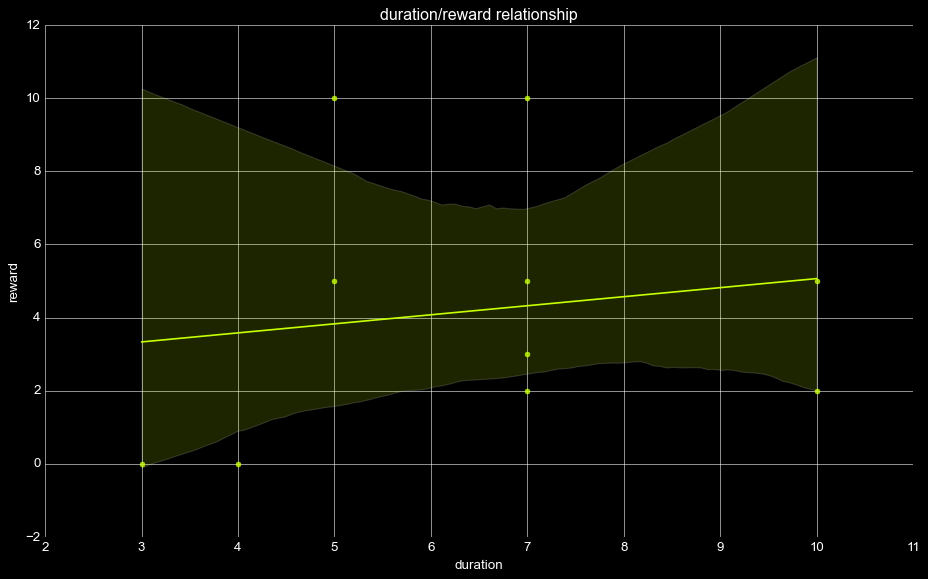

In [50]:
plot_init()
plt.title("duration/reward relationship")
sns.regplot(x="duration",y="reward", data=portfolio, color="#C6FF06")

In [51]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


<AxesSubplot:title={'center':'Bar plot offer_type/duration'}, xlabel='offer_type', ylabel='duration'>

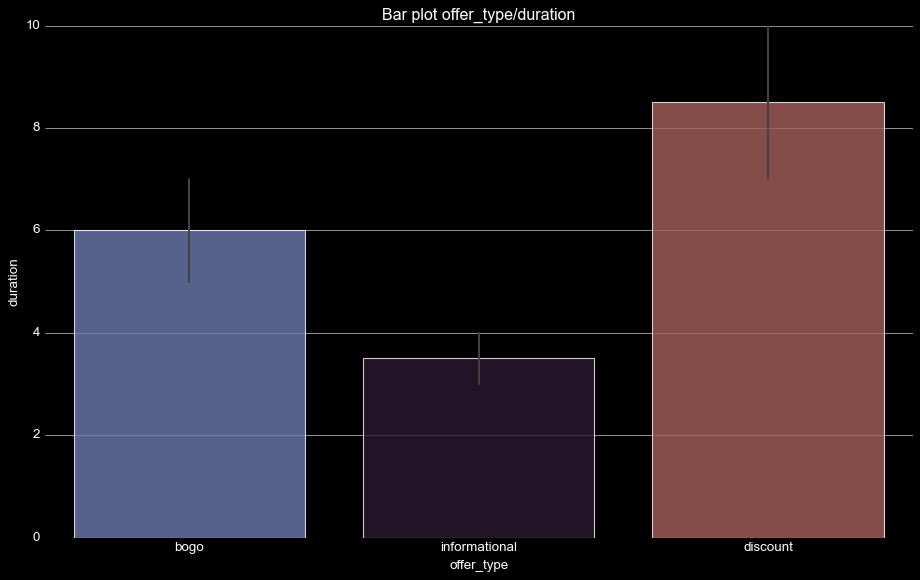

In [52]:
plot_init()
plt.title("Bar plot offer_type/duration")
sns.barplot(x="offer_type",y="duration",data=portfolio, palette="twilight", alpha=.8)

<AxesSubplot:title={'center':'Bar plot offer_type/reward'}, xlabel='offer_type', ylabel='reward'>

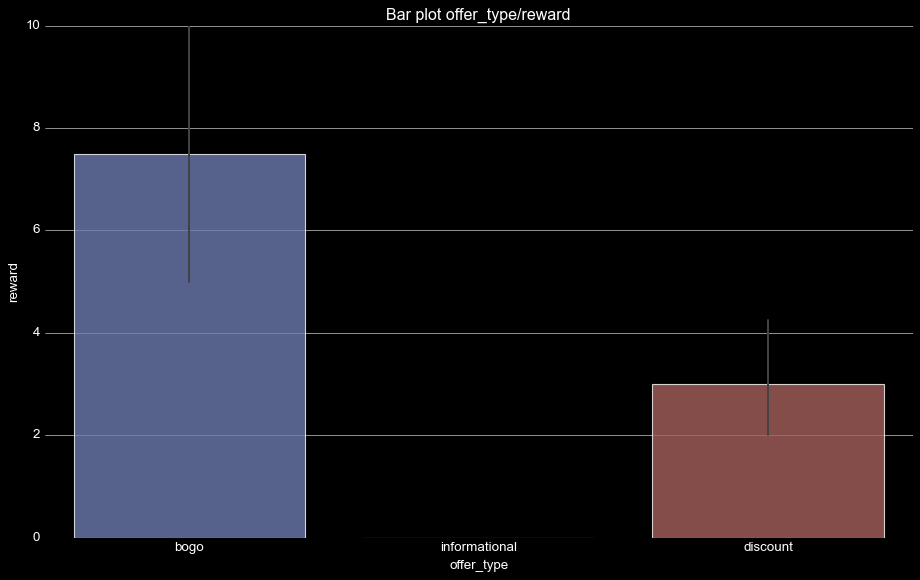

In [53]:
plot_init()
plt.title("Bar plot offer_type/reward")
sns.barplot(x="offer_type",y="reward",data=portfolio, palette="twilight", alpha=.8)

<AxesSubplot:title={'center':'Bar plot offer_type/difficulty'}, xlabel='offer_type', ylabel='difficulty'>

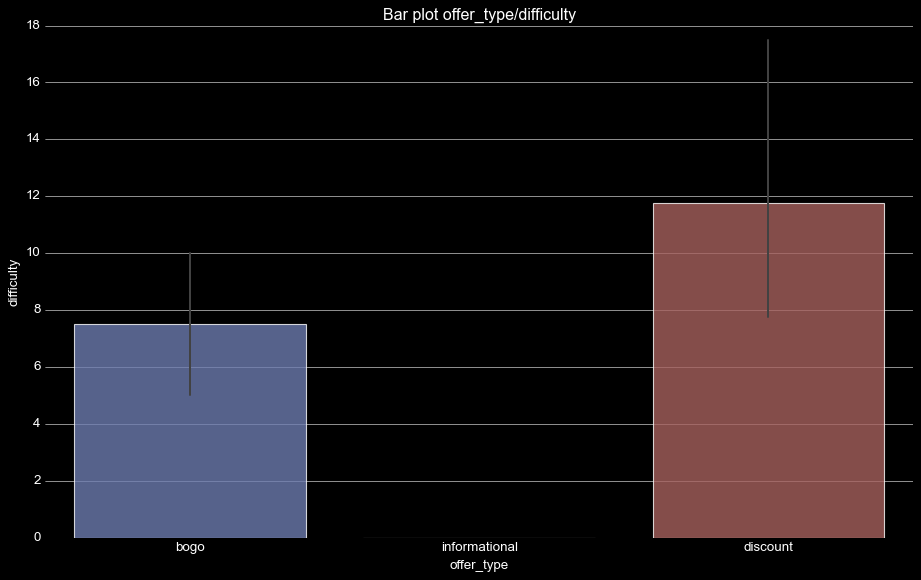

In [54]:
plot_init()
plt.title("Bar plot offer_type/difficulty")
sns.barplot(x="offer_type",y="difficulty",data=portfolio, palette="twilight", alpha=.8)

In [55]:

portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [56]:
dum = pd.get_dummies(portfolio['channels'].explode())
portfolio = pd.concat([portfolio, dum.groupby(level=0).sum()], axis=1).drop('channels', axis=1)

In [57]:
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


C:\Users\Bala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of channels usage'}, xlabel='index', ylabel='0'>

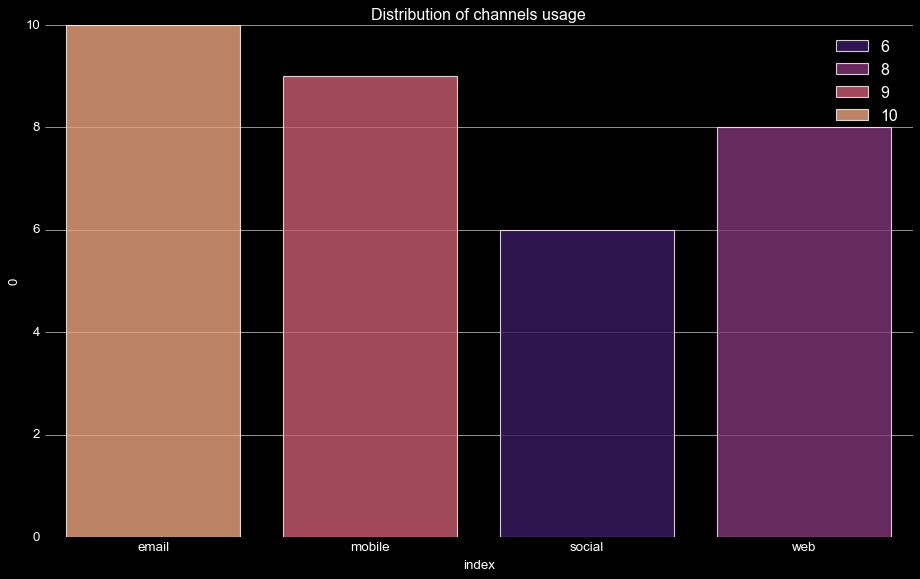

In [58]:
plot_init()
plt.title("Distribution of channels usage")
sns.barplot(portfolio[["email","mobile","social","web"]].sum().reset_index()["index"],portfolio[["email","mobile","social","web"]].sum().reset_index()[0],
           alpha=.8, palette="magma", hue=portfolio[["email","mobile","social","web"]].sum().reset_index()[0], dodge=False)

In [59]:
transcript["event"].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [60]:
transcript[transcript["event"]=="offer completed"].iloc[0]

person                     9fa9ae8f57894cc9a3b8a9bbe0fc1b2f
event                                       offer completed
value     {'offer_id': '2906b810c7d4411798c6938adc9daaa5...
time                                                      0
Name: 12658, dtype: object

In [61]:
clvals = []
for i in range(len(transcript)):
    row = transcript["value"][i]
    event = transcript["event"][i]
    if event=="offer received" or event=="offer viewed" or event=="offer completed":
        try:
            r = row["offer id"]
        except:
            r = row["offer_id"]
    elif event=="transaction":
        r = row["amount"]
    
    clvals.append(r)

In [62]:
tt = transcript.drop("value", axis=1)
tt["value"] = clvals
transcript = tt
transcript

,person,event,time,value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53


In [63]:
transcript[transcript["event"]=="transaction"]["value"].mean()

12.77735615639814

In [64]:
transcript[transcript["event"]=="transaction"]["value"].median()

8.89

In [65]:
transcript[transcript["event"]=="transaction"]["value"].min()

0.05

In [66]:
transcript[transcript["event"]=="transaction"]["value"].max()

1062.28

<AxesSubplot:title={'center':'Transactions price amount distribution (log scale)'}, xlabel='value', ylabel='Count'>

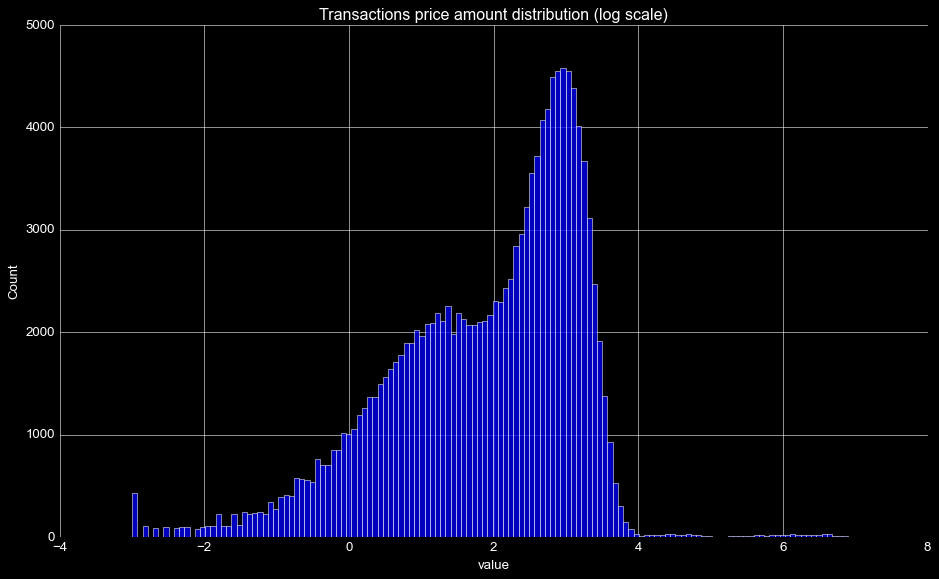

In [67]:
plot_init()
plt.title("Transactions price amount distribution (log scale)")
sns.histplot(x=np.log(transcript[transcript["event"]=="transaction"]["value"].astype('float64')))

C:\Users\Bala\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Transactions price amount distribution (log scale)'}, xlabel='value', ylabel='Density'>

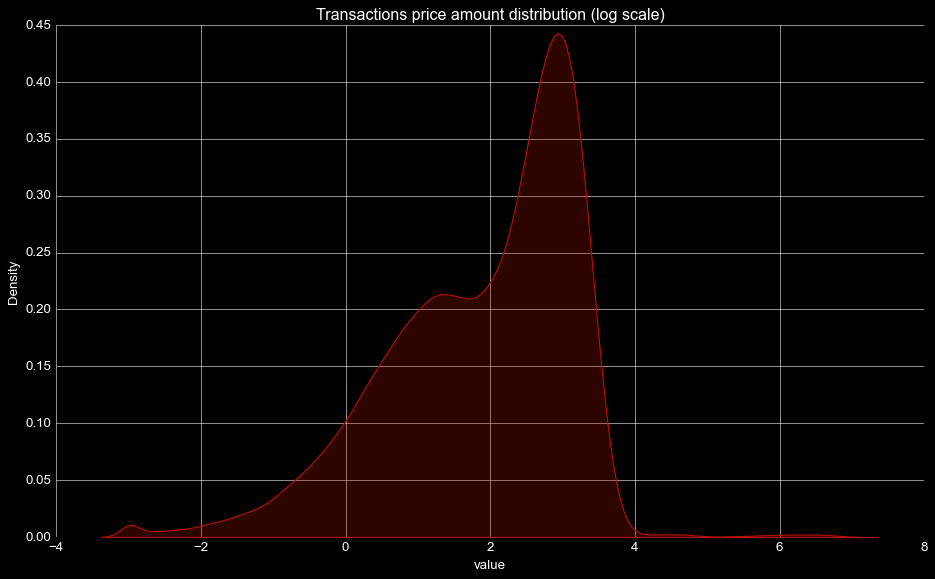

In [68]:

plot_init()
plt.title("Transactions price amount distribution (log scale)")
sns.kdeplot(x=np.log(transcript[transcript["event"]=="transaction"]["value"].astype('float64')), fill=True, color="#B91100", bw=0.10)

<AxesSubplot:xlabel='value'>

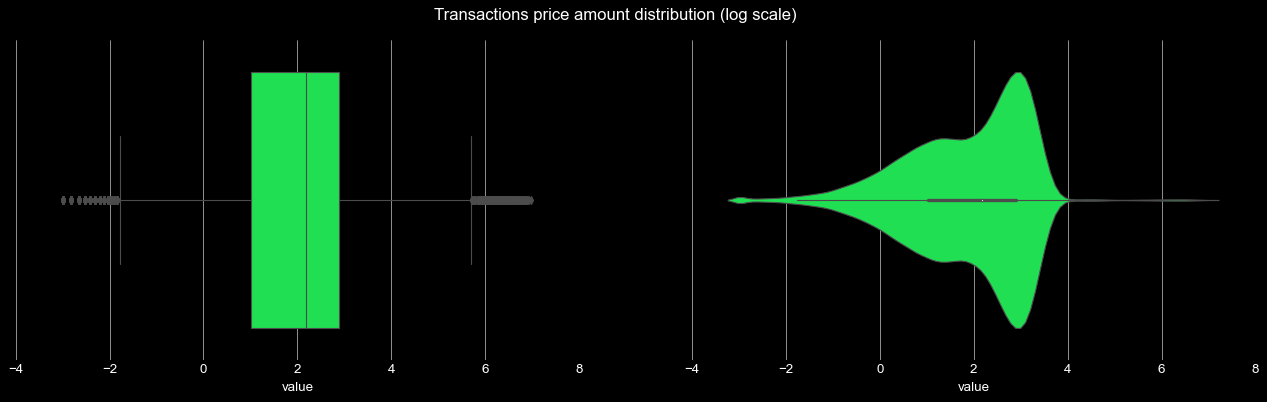

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))

fig.suptitle("Transactions price amount distribution (log scale)", size=15)
sns.boxplot(x=np.log(transcript[transcript["event"]=="transaction"]["value"].astype('float64')), ax=axs[0], color="#00ff44")
sns.violinplot(x=np.log(transcript[transcript["event"]=="transaction"]["value"].astype('float64')), ax=axs[1], color="#00ff44")

C:\Users\Bala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of Event data'}, xlabel='event', ylabel='count'>

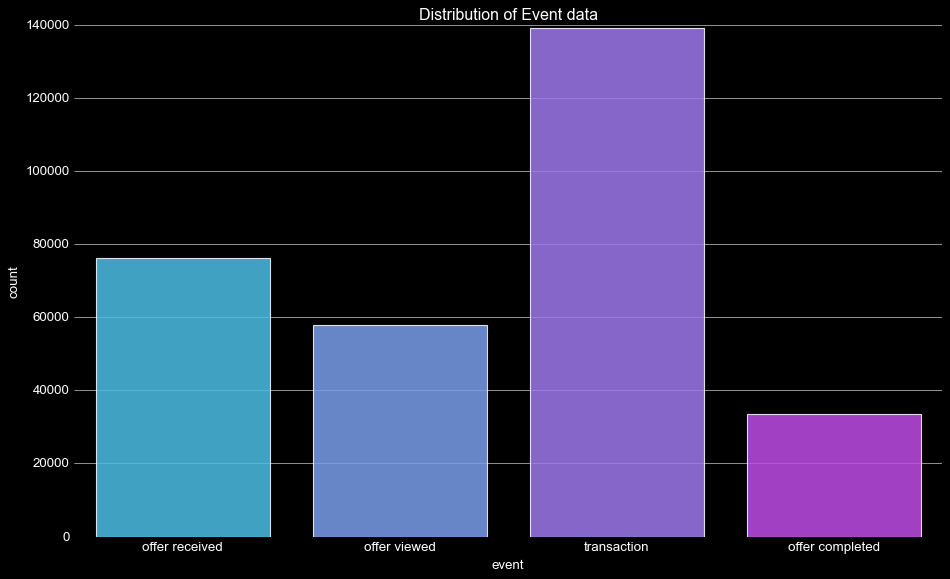

In [70]:
plot_init()
plt.title("Distribution of Event data")
sns.countplot(transcript["event"], palette="cool", alpha=.85)

In [71]:
transcript[transcript["event"]=="transaction"]["time"].mean()

381.58433427130035

In [72]:
ts_pf = transcript.merge(profile, left_on="person", right_on="id").drop("id", axis=1)
ts_pf

,person,event,time,value,gender,age,became_member_on,income,age_group,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,75,20170509,100000.0,>60,>80000
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,75,20170509,100000.0,>60,>80000
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,F,75,20170509,100000.0,>60,>80000
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,75,20170509,100000.0,>60,>80000
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,17.78,F,75,20170509,100000.0,>60,>80000
...,...,...,...,...,...,...,...,...,...,...
272757,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,504,3f207df678b143eea3cee63160fa8bed,M,47,20171013,94000.0,41-50,>80000
272758,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,M,47,20171013,94000.0,41-50,>80000
272759,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,4d5c57ea9a6940dd891ad53e9dbe8da0,M,47,20171013,94000.0,41-50,>80000
272760,3045af4e98794a04a5542d3eac939b1f,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,F,58,20161020,78000.0,51-59,66000-75000


<AxesSubplot:title={'center':'Events occurence grouped by customer gender'}, xlabel='event', ylabel='count'>

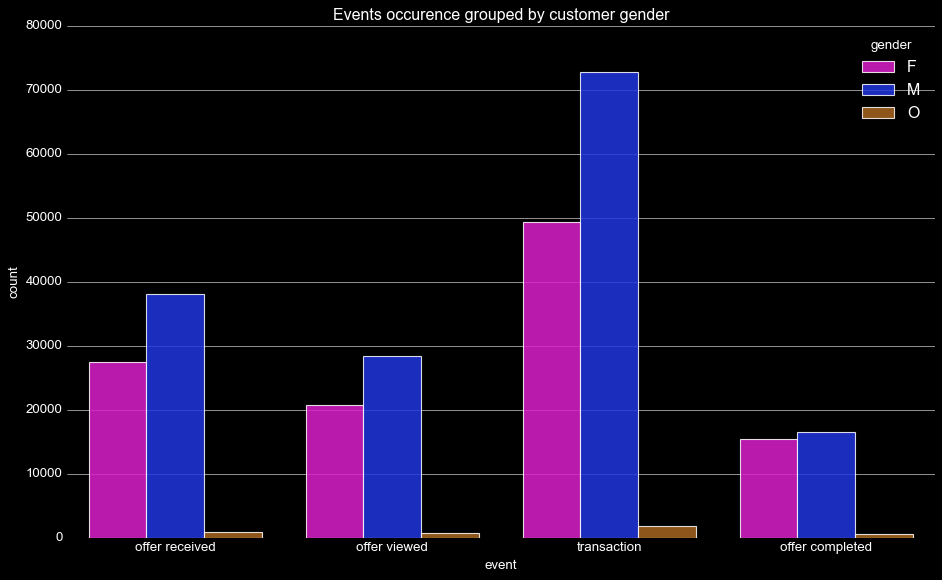

In [73]:
ts_pf_trimmed_transaction = ts_pf[ts_pf["event"]=="transaction"]
ts_pf_trimmed_transaction["log_value"] = np.log(ts_pf_trimmed_transaction["value"].astype('float64'))
plot_init()
plt.title("Events occurence grouped by customer gender")
sns.countplot(x="event", hue="gender", data=ts_pf, palette=["#fa00e5","#001eff","#bf6708"], alpha=.85)

Text(0.5, 8.844444444444436, 'Transaction Amount (log scale)')

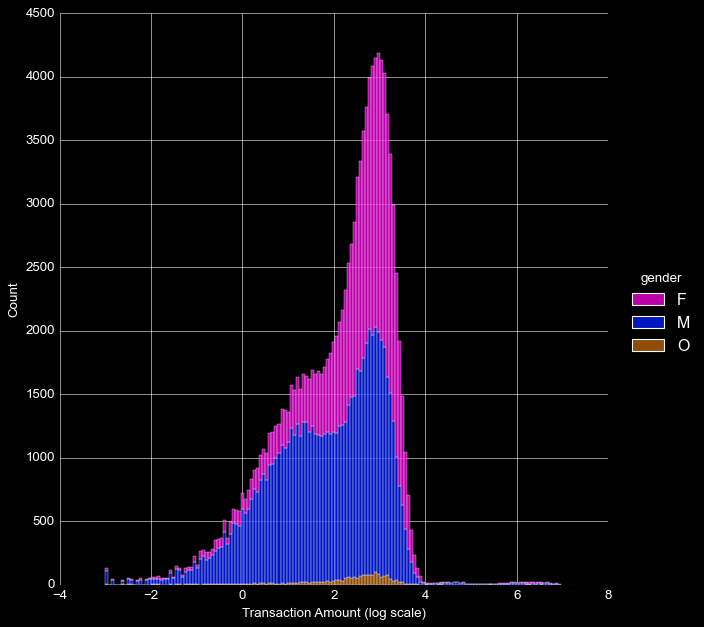

In [74]:
d = sns.displot(x="log_value", multiple="stack", hue="gender",data=ts_pf_trimmed_transaction, height=8, kind="hist", palette=["#fa00e5","#001eff","#bf6708"])
axes = d.axes.flatten()
axes[0].set_xlabel('Transaction Amount (log scale)')

<AxesSubplot:title={'center':'Events occurence grouped by customer age group'}, xlabel='event', ylabel='count'>

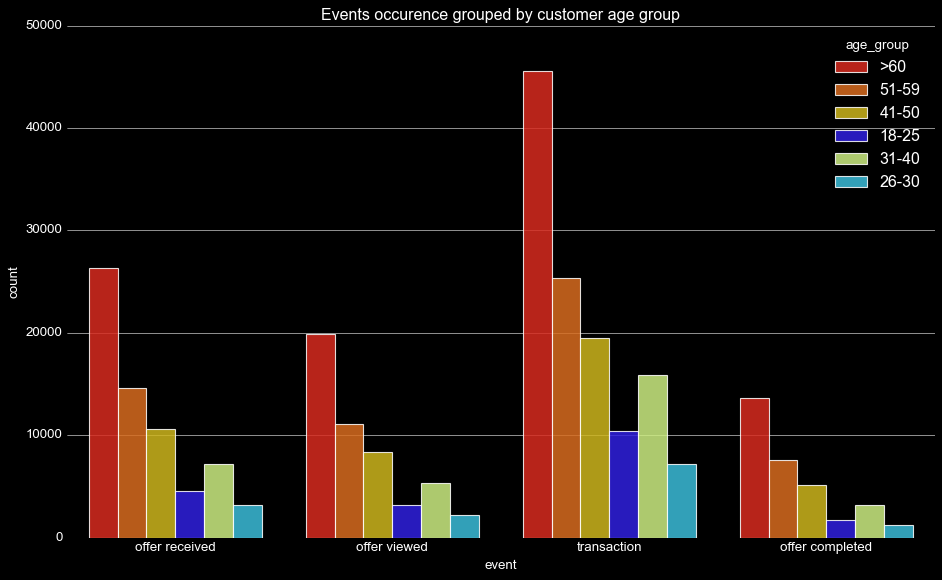

In [75]:
age_group_palette_tr_natu = ["#f71000","#f76700","#ebcb00","#1500ff","#d4ff70","#20cef5"]
plot_init()
plt.title("Events occurence grouped by customer age group")
sns.countplot(x="event", hue="age_group", data=ts_pf, palette=age_group_palette_tr_natu, alpha=.85)

Text(0.5, 8.844444444444436, 'Transaction Amount (log scale)')

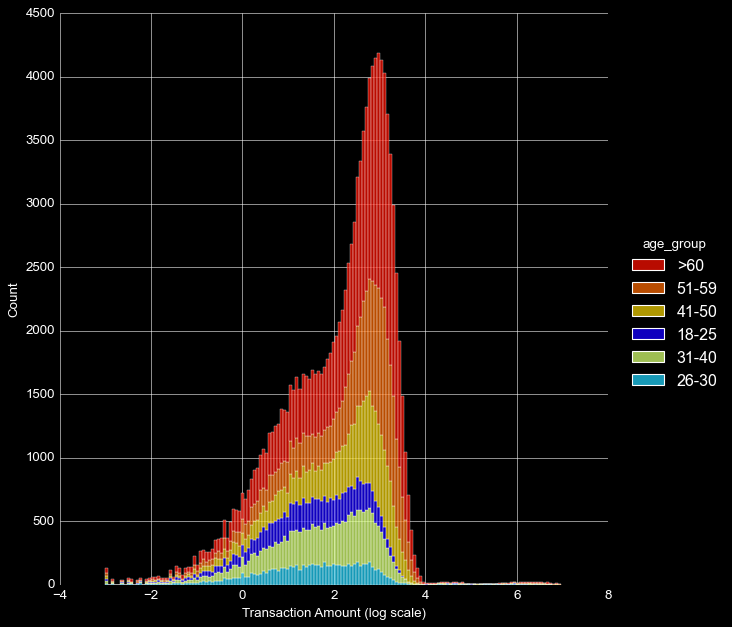

In [76]:
d = sns.displot(x="log_value", hue="age_group",data=ts_pf_trimmed_transaction, height=8, kind="hist", palette=age_group_palette_tr_natu, multiple="stack")
axes = d.axes.flatten()
axes[0].set_xlabel('Transaction Amount (log scale)')

<AxesSubplot:title={'center':'Events occurence grouped by customer income group'}, xlabel='event', ylabel='count'>

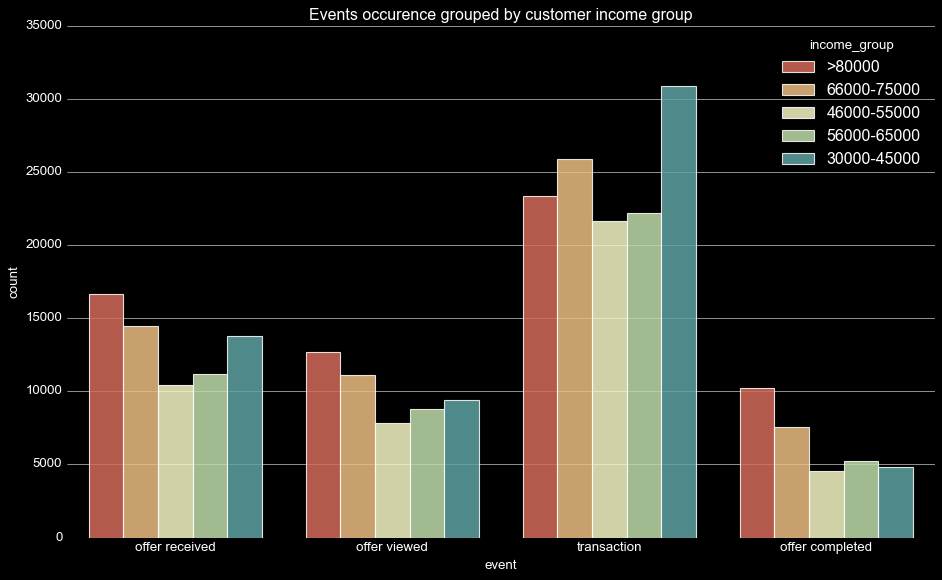

In [77]:
plot_init()
plt.title("Events occurence grouped by customer income group")
sns.countplot(x="event", hue="income_group", data=ts_pf, alpha=.85, palette="Spectral")

Text(0.5, 8.844444444444436, 'Transaction Amount (log scale)')

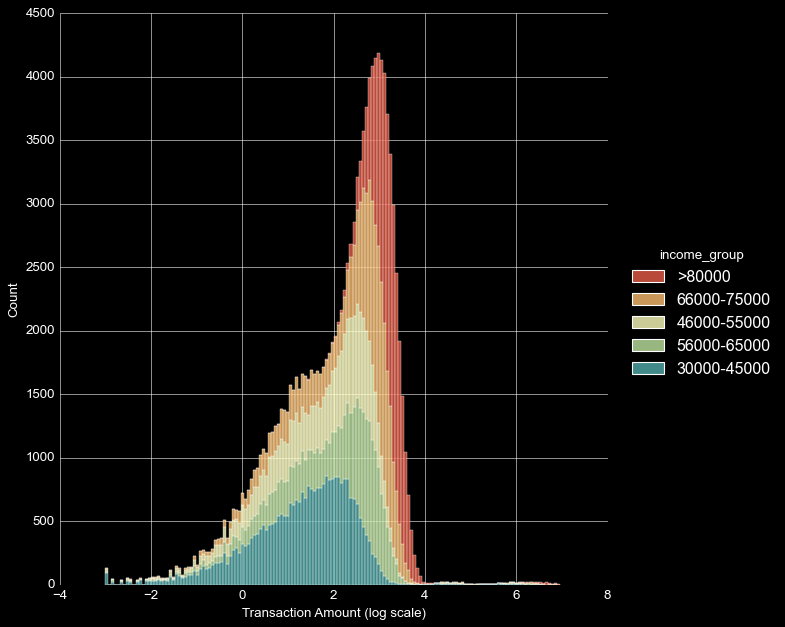

In [78]:
d = sns.displot(x="log_value", multiple="stack", hue="income_group",data=ts_pf_trimmed_transaction, height=8, kind="hist", palette="Spectral", alpha=.8)
axes = d.axes.flatten()
axes[0].set_xlabel('Transaction Amount (log scale)')

In [79]:
ts_pf_trimmed_transaction["value"] = ts_pf_trimmed_transaction["value"].astype("float64")
a = ts_pf_trimmed_transaction.groupby("income_group")["value"].count().reset_index()
a.rename(columns={"value":"transactions"},inplace=True)
b = ts_pf_trimmed_transaction.groupby("income_group")["value"].mean().reset_index()
b

,income_group,value
0,30000-45000,6.458926
1,46000-55000,9.310162
2,56000-65000,11.788251
3,66000-75000,16.040742
4,>80000,28.148975


In [80]:
a["value_represented"] = a["transactions"] * b["value"]
a = a.sort_values("value_represented", ascending=False)
a

,income_group,transactions,value_represented
4,>80000,23348,657222.26
3,66000-75000,25862,414845.68
2,56000-65000,22199,261687.38
1,46000-55000,21669,201741.90
0,30000-45000,30879,199445.18


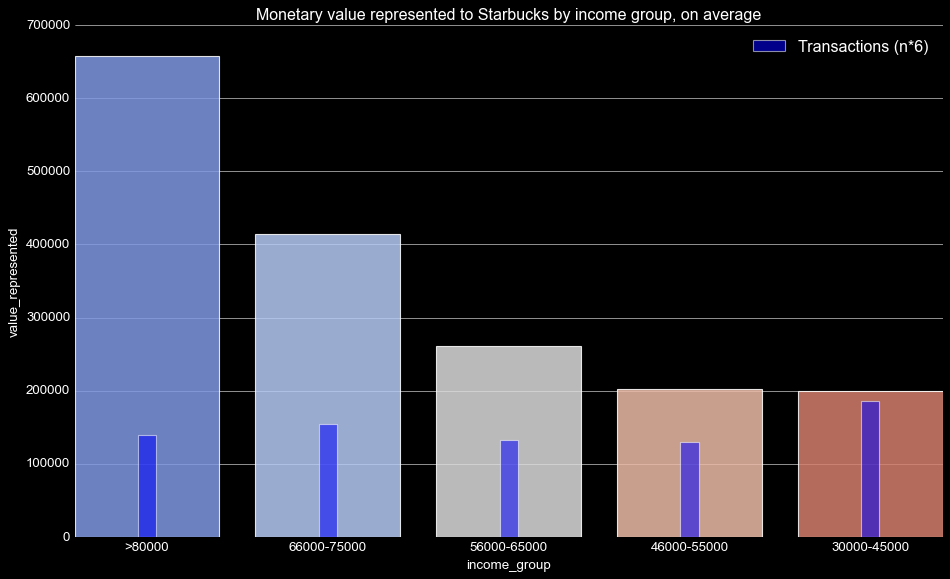

In [81]:
plot_init()
plt.title("Monetary value represented to Starbucks by income group, on average")
sns.barplot(x="income_group",y="value_represented", palette="coolwarm",data=a, alpha=.85)
plt.bar(a["income_group"],a["transactions"]*6, width=0.1, color="blue", alpha=.55, label="Transactions (n*6)")
#transactions multiplied by a factor of n*6 as this way the data is more clearly visualised on the value_represented scale
plt.legend()

Text(0, 0.5, 'Transaction Value (log)')

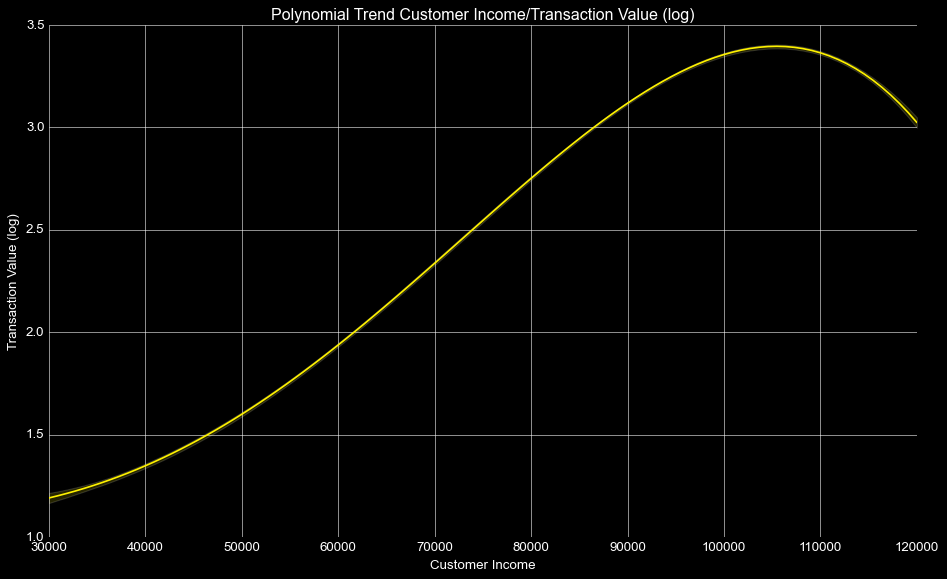

In [82]:
plot_init()
plt.title("Polynomial Trend Customer Income/Transaction Value (log)")
sns.regplot(x="income",y="log_value", data=ts_pf_trimmed_transaction, scatter=False, order=4, color="#fff200")
plt.xlabel("Customer Income")
plt.ylabel("Transaction Value (log)")

In [83]:
np.corrcoef(ts_pf_trimmed_transaction["income"],ts_pf_trimmed_transaction["log_value"])[0][1]

0.5452444199862206

In [84]:
np.corrcoef(ts_pf_trimmed_transaction["income"],ts_pf_trimmed_transaction["log_value"])[0][1]**2

0.2972914775261102

(20.0, 100.0)

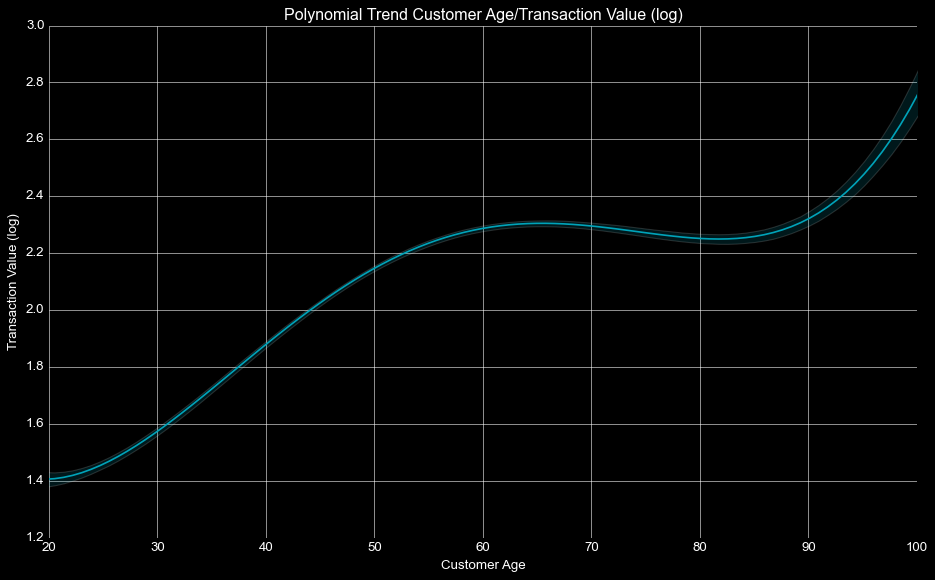

In [85]:
plot_init()
plt.title("Polynomial Trend Customer Age/Transaction Value (log)")
sns.regplot(x="age",y="log_value", data=ts_pf_trimmed_transaction, scatter=False, order=4, color="#00A3B9")
plt.xlabel("Customer Age")
plt.ylabel("Transaction Value (log)")
plt.xlim(20,100)

In [86]:
np.corrcoef(ts_pf_trimmed_transaction["age"],ts_pf_trimmed_transaction["log_value"])[0][1]

0.22949111541962366

In [87]:
np.corrcoef(ts_pf_trimmed_transaction["age"],ts_pf_trimmed_transaction["log_value"])[0][1]**2

0.05266617205654303

In [88]:
ts_pf_trimmed_transaction

,person,event,time,value,gender,age,became_member_on,income,age_group,income_group,log_value
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,F,75,20170509,100000.0,>60,>80000,2.990217
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,17.78,F,75,20170509,100000.0,>60,>80000,2.878074
7,78afa995795e4d85b5d9ceeca43f5fef,transaction,222,19.67,F,75,20170509,100000.0,>60,>80000,2.979095
8,78afa995795e4d85b5d9ceeca43f5fef,transaction,240,29.72,F,75,20170509,100000.0,>60,>80000,3.391820
9,78afa995795e4d85b5d9ceeca43f5fef,transaction,378,23.93,F,75,20170509,100000.0,>60,>80000,3.175133
...,...,...,...,...,...,...,...,...,...,...,...
272744,47683732768a4f7db7abb710ca22e66e,transaction,684,7.10,M,24,20171108,56000.0,18-25,56000-65000,1.960095
272747,3873fe915496482eb589fa316ae7b0db,transaction,510,1.57,M,58,20170905,57000.0,51-59,56000-65000,0.451076
272750,3873fe915496482eb589fa316ae7b0db,transaction,588,1.21,M,58,20170905,57000.0,51-59,56000-65000,0.190620
272751,3873fe915496482eb589fa316ae7b0db,transaction,612,2.65,M,58,20170905,57000.0,51-59,56000-65000,0.974560


In [89]:
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [90]:
ts_pf_offers_portfolio = ts_pf[ts_pf["event"]!="transaction"]
ts_pf_offers_portfolio.rename(columns={"value": "id"}, inplace=True)
ts_pf_offers_portfolio = ts_pf_offers_portfolio.merge(portfolio)
ts_pf_offers_portfolio

,person,event,time,id,gender,age,became_member_on,income,age_group,income_group,reward,difficulty,duration,offer_type,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,75,20170509,100000.0,>60,>80000,5,5,7,bogo,1,1,0,1
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,75,20170509,100000.0,>60,>80000,5,5,7,bogo,1,1,0,1
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,75,20170509,100000.0,>60,>80000,5,5,7,bogo,1,1,0,1
3,e2127556f4f64592b11af22de27a7932,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,M,68,20180426,70000.0,>60,66000-75000,5,5,7,bogo,1,1,0,1
4,e2127556f4f64592b11af22de27a7932,offer viewed,420,9b98b8c7a33c4b65b9aebfe6a799e6d9,M,68,20180426,70000.0,>60,66000-75000,5,5,7,bogo,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148800,8578196a074a4f328976e334fa9383a3,offer viewed,504,4d5c57ea9a6940dd891ad53e9dbe8da0,M,48,20180610,58000.0,41-50,56000-65000,10,10,5,bogo,1,1,1,1
148801,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,M,47,20171013,94000.0,41-50,>80000,10,10,5,bogo,1,1,1,1
148802,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,4d5c57ea9a6940dd891ad53e9dbe8da0,M,47,20171013,94000.0,41-50,>80000,10,10,5,bogo,1,1,1,1
148803,3045af4e98794a04a5542d3eac939b1f,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,F,58,20161020,78000.0,51-59,66000-75000,10,10,5,bogo,1,1,1,1


In [91]:
len(ts_pf_offers_portfolio)+len(ts_pf_trimmed_transaction)==len(ts_pf)

True

<AxesSubplot:title={'center':'Offer types grouped by customer gender'}, xlabel='offer_type', ylabel='count'>

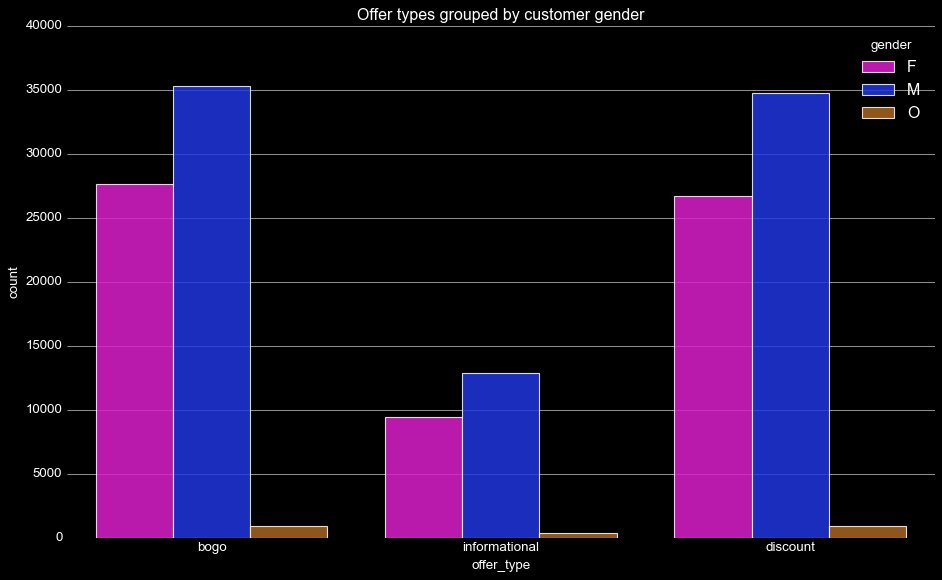

In [92]:
tpop = ts_pf_offers_portfolio
plot_init()
plt.title("Offer types grouped by customer gender")
sns.countplot(x="offer_type",hue="gender", data=tpop, palette=["#fa00e5","#001eff","#bf6708"], alpha=.85)

<AxesSubplot:title={'center':'Offer types grouped by customer age group'}, xlabel='offer_type', ylabel='count'>

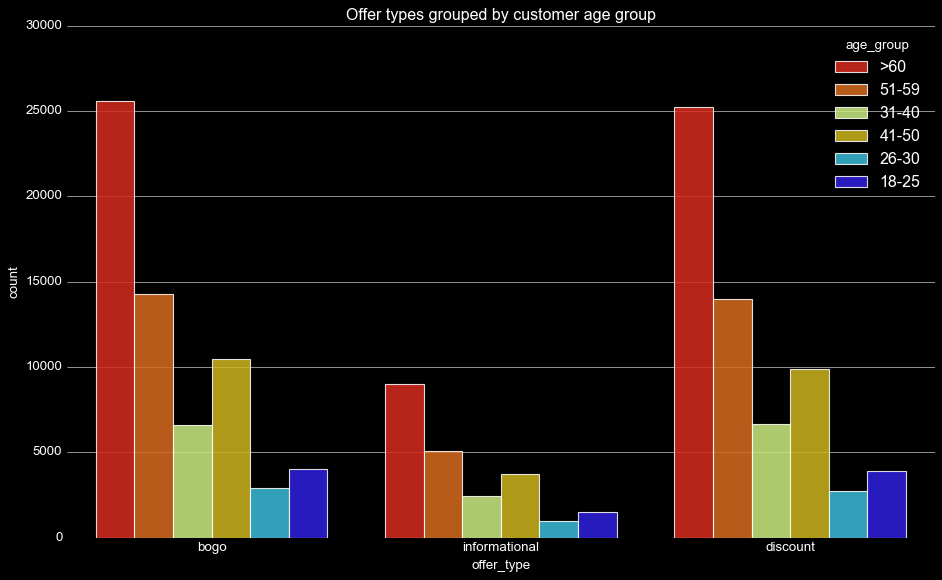

In [93]:
age_group_palette_tr_natu2 = ["#f71000","#f76700","#d4ff70","#ebcb00","#20cef5","#1500ff"]
plot_init()
plt.title("Offer types grouped by customer age group")
sns.countplot(x="offer_type",hue="age_group", data=tpop, palette=age_group_palette_tr_natu2, alpha=.85)

<AxesSubplot:title={'center':'Offer types grouped by customer income group'}, xlabel='offer_type', ylabel='count'>

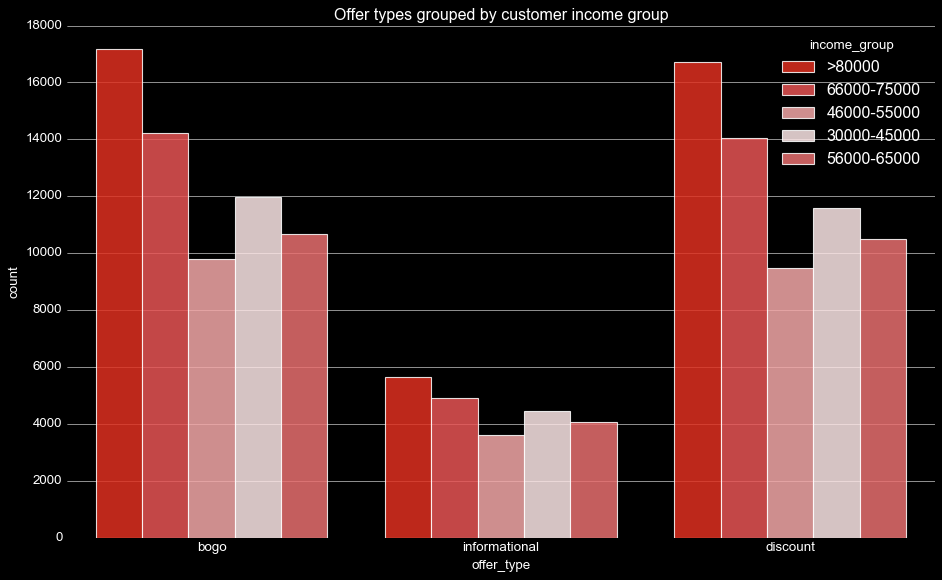

In [94]:
inc_nat_pal = ["#ff1500","#ff3b3b","#ff9c9c","#ffe3e3","#fc5b5b"]
plot_init()
plt.title("Offer types grouped by customer income group")
sns.countplot(x="offer_type",hue="income_group", data=tpop, palette=inc_nat_pal, alpha=.85)

(0.0, 714.0)

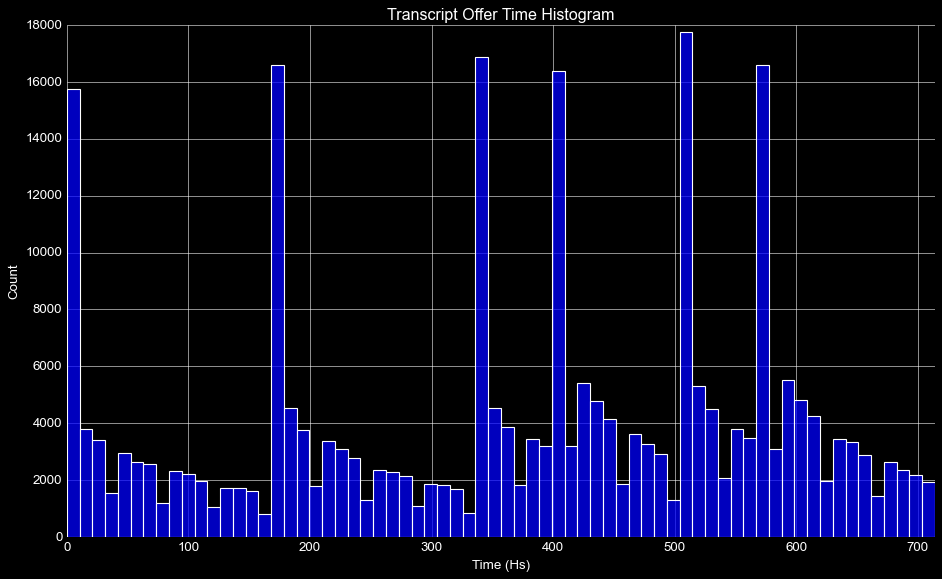

In [95]:
plot_init()
plt.title("Transcript Offer Time Histogram")
sns.histplot(ts_pf["time"])
plt.xlabel("Time (Hs)")
plt.xlim(0,714)

In [96]:
ts_pf["time"].max()/24

29.75

In [97]:
tptt = ts_pf_trimmed_transaction

In [98]:
tpop["time_in_days"] = tpop["time"]/24
tptt["time_in_days"] = tptt["time"]/24
portfolio["offer_name"] = ["offer_bogo_a","offer_bogo_b","offer_informational_a","offer_bogo_c","offer_discount_a","offer_discount_b","offer_discount_c","offer_informational_b",
"offer_bogo_d","offer_discount_d"]
transcript = transcript.sort_values(["person","time"]).reset_index()
transcript_old = transcript
transcript_old

,index,person,event,time,value
0,55972,0009655768c64bdeb2e877511632db8f,offer received,168,5a8bc65990b245e5a138643cd4eb9837
1,77705,0009655768c64bdeb2e877511632db8f,offer viewed,192,5a8bc65990b245e5a138643cd4eb9837
2,89291,0009655768c64bdeb2e877511632db8f,transaction,228,22.16
3,113605,0009655768c64bdeb2e877511632db8f,offer received,336,3f207df678b143eea3cee63160fa8bed
4,139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,3f207df678b143eea3cee63160fa8bed
...,...,...,...,...,...
306529,258361,ffff82501cea40309d5fdd7edcca4a07,transaction,576,14.23
306530,258362,ffff82501cea40309d5fdd7edcca4a07,offer completed,576,2906b810c7d4411798c6938adc9daaa5
306531,262475,ffff82501cea40309d5fdd7edcca4a07,offer viewed,582,2906b810c7d4411798c6938adc9daaa5
306532,274809,ffff82501cea40309d5fdd7edcca4a07,transaction,606,10.12


In [99]:
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web,offer_name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,offer_bogo_a
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,offer_bogo_b
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,offer_informational_a
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,offer_bogo_c
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,offer_discount_a
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,offer_discount_b
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,offer_discount_c
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,offer_informational_b
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,offer_bogo_d
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,offer_discount_d


In [105]:
import time
import sys
transcript

,index,person,event,time,value
0,55972,0009655768c64bdeb2e877511632db8f,offer received,168,5a8bc65990b245e5a138643cd4eb9837
1,77705,0009655768c64bdeb2e877511632db8f,offer viewed,192,5a8bc65990b245e5a138643cd4eb9837
2,89291,0009655768c64bdeb2e877511632db8f,transaction,228,22.16
3,113605,0009655768c64bdeb2e877511632db8f,offer received,336,3f207df678b143eea3cee63160fa8bed
4,139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,3f207df678b143eea3cee63160fa8bed
...,...,...,...,...,...
306529,258361,ffff82501cea40309d5fdd7edcca4a07,transaction,576,14.23
306530,258362,ffff82501cea40309d5fdd7edcca4a07,offer completed,576,2906b810c7d4411798c6938adc9daaa5
306531,262475,ffff82501cea40309d5fdd7edcca4a07,offer viewed,582,2906b810c7d4411798c6938adc9daaa5
306532,274809,ffff82501cea40309d5fdd7edcca4a07,transaction,606,10.12


In [ ]:
import time
start_time = time.time()

#transaction classifier algorithm

initial_df = pd.DataFrame(columns=["person","transaction_value","dependent","offer_id"])
offer_status = ["void","void",None]
offer_status[2] = time
last_person = "void"
average_time = []

transactions_classified1 = ["", 0, "n",""]
transactions_classified2 = ["", 0, "n",""]
transactions_classified3 = ["", 0, "n",""]
transactions_classified4 = ["", 0, "n",""]
transactions_classified5 = ["", 0, "n",""]
transactions_classified6 = ["", 0, "n",""]



revreset = 0
cnt = 1

for i in range(len(transcript)):
    start = time.time()
    
    time_simple = transcript["time"][i]
    time_day = transcript["time"][i]/24
    person = transcript["person"][i]
    event = transcript["event"][i]
    if event!="transaction":
        offer_id = transcript["value"][i]
    elif event=="transaction":
        trans_value = transcript["value"][i]
    
    
    #ofer_status update
        
    if event=="offer received":
        offer_status[0] = "offer received, not viewed"
        offer_status[1] = offer_id
        offer_status[2] = time_simple
        last_person = person
    
    elif event=="offer viewed":
        offer_status[0] = "offer viewed"
        offer_status[1] = offer_id
        offer_status[2] = time_simple
        last_person = person
    
    elif event=="transaction":
        
        if person==last_person:
            if offer_status[0]=="offer received, not viewed":
                offer_status[0] = "transaction (independent)"
                dep = "n"
                offer_status[1] = f"${trans_value}"
                offer_id = np.nan
        
            elif offer_status[0]=="offer completed":
                offer_status[0] = "transaction (independent)"
                dep = "n"
                offer_status[1] = f"${trans_value}"
                offer_id = np.nan
            
            
            elif offer_status[0]=="offer viewed":
                offer_difficulty_min = portfolio[portfolio.id==offer_id]['difficulty'].item()
                if trans_value>=offer_difficulty_min:
                    offer_status[0] = "transaction (offer-viewed)"
                    dep = "y"
                    offer_status[1] = f"${trans_value} - {offer_id}"
                else:
                    offer_status[0] = "transaction (independent)"
                    dep = "n"
                    offer_status[1] = f"${trans_value}"
                    offer_id = np.nan
                    
                
            
                #there can exist transactions just after the visualisation of an offer, and the offer already be completed before without knowing it,
                #but these occur likely because of the visualisation of the offer, so i will consider them as such
        
            elif offer_status[0]=="void":
                offer_status[0] = "transaction (independent)"
                dep = "n"
                offer_status[1] = f"${trans_value}"
                offer_id = np.nan
                
        elif person!=last_person:
                offer_status[0] = "transaction (independent)"
                dep = "n"
                offer_status[1] = f"${trans_value}"
                offer_id = np.nan
        
            
            
        if revreset>=50000 and cnt!=6:
            time.sleep(5) #cool down cpu
            cnt = cnt+1
            revreset = 0
            print(f"{i}: reached current array limit, changing to array {cnt} - t.: {time.time()}")

        
        
        tr_to_append = [person,trans_value,dep,offer_id]
        #distributes data across arrays to drastically reduce time when stacking
        
        if cnt==1:
            transactions_classified1 = np.vstack((transactions_classified1,tr_to_append))
        elif cnt==2:
            transactions_classified2 = np.vstack((transactions_classified2,tr_to_append))
        elif cnt==3:
            transactions_classified3 = np.vstack((transactions_classified3,tr_to_append))
        elif cnt==4:
            transactions_classified4 = np.vstack((transactions_classified4,tr_to_append))
        elif cnt==5:
            transactions_classified5 = np.vstack((transactions_classified5,tr_to_append))
        elif cnt==6:
            transactions_classified6 = np.vstack((transactions_classified6,tr_to_append))
                

    
    elif event=="offer completed":
        offer_status[0] = "offer completed"
        offer_status[1] = offer_id
        last_person = person
    
    revreset = revreset+1

    

    print(f"{person[:6]} - {offer_status[0]} - {offer_status[1]} - {time_day}")
    print("")

In [ ]:
transactions_classified1 = np.delete(transactions_classified1, (0), axis=0)
transactions_classified2 = np.delete(transactions_classified2, (0), axis=0)
transactions_classified3 = np.delete(transactions_classified3, (0), axis=0)
transactions_classified4 = np.delete(transactions_classified4, (0), axis=0)
transactions_classified5 = np.delete(transactions_classified5, (0), axis=0)
transactions_classified6 = np.delete(transactions_classified6, (0), axis=0)

z = np.vstack((transactions_classified1,transactions_classified2))
z = np.vstack((z,transactions_classified3))
z = np.vstack((z,transactions_classified4))
z = np.vstack((z,transactions_classified5))
z = np.vstack((z,transactions_classified6))


full_transactions_classified = z

In [121]:
full_transactions_classified = pd.DataFrame(full_transactions_classified)
full_transactions_classified.rename(columns={0:"person",1:"transaction_value",2:"dependent",3:"offer_id"}, inplace=True)
portfolio.rename(columns={"id": "offer_id"},inplace=True)
full_transactions_classified

,person,transaction_value,dependent,offer_id
0,0009655768c64bdeb2e877511632db8f,22.16,y,5a8bc65990b245e5a138643cd4eb9837
1,0009655768c64bdeb2e877511632db8f,8.57,n,nan
2,0009655768c64bdeb2e877511632db8f,14.11,n,nan
3,0009655768c64bdeb2e877511632db8f,13.56,y,fafdcd668e3743c1bb461111dcafc2a4
4,0009655768c64bdeb2e877511632db8f,10.27,n,nan
...,...,...,...,...
138948,ffff82501cea40309d5fdd7edcca4a07,13.17,n,nan
138949,ffff82501cea40309d5fdd7edcca4a07,7.79,n,nan
138950,ffff82501cea40309d5fdd7edcca4a07,14.23,n,nan
138951,ffff82501cea40309d5fdd7edcca4a07,10.12,y,2906b810c7d4411798c6938adc9daaa5


In [122]:
trans_to_use = full_transactions_classified.merge(portfolio, on='offer_id')
trans_to_use = trans_to_use[trans_to_use['offer_type']!='informational']
class_trans_dependent_merged = trans_to_use.merge(portfolio)
transcript

,index,person,event,time,value
0,55972,0009655768c64bdeb2e877511632db8f,offer received,168,5a8bc65990b245e5a138643cd4eb9837
1,77705,0009655768c64bdeb2e877511632db8f,offer viewed,192,5a8bc65990b245e5a138643cd4eb9837
2,89291,0009655768c64bdeb2e877511632db8f,transaction,228,22.16
3,113605,0009655768c64bdeb2e877511632db8f,offer received,336,3f207df678b143eea3cee63160fa8bed
4,139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,3f207df678b143eea3cee63160fa8bed
...,...,...,...,...,...
306529,258361,ffff82501cea40309d5fdd7edcca4a07,transaction,576,14.23
306530,258362,ffff82501cea40309d5fdd7edcca4a07,offer completed,576,2906b810c7d4411798c6938adc9daaa5
306531,262475,ffff82501cea40309d5fdd7edcca4a07,offer viewed,582,2906b810c7d4411798c6938adc9daaa5
306532,274809,ffff82501cea40309d5fdd7edcca4a07,transaction,606,10.12


In [123]:
profile.rename(columns={"id": "person"}, inplace=True)
transcript_profile = transcript.merge(profile)
portfolio

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,offer_name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,offer_bogo_a
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,offer_bogo_b
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,offer_informational_a
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,offer_bogo_c
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,offer_discount_a
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,offer_discount_b
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,offer_discount_c
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,offer_informational_b
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,offer_bogo_d
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,offer_discount_d


In [124]:
compcount = transcript_profile[transcript_profile.event=="offer completed"].groupby("value")["index"].count().reset_index().rename(columns={"value": "offer_id","index":"count_completed"})
compcount = transcript_profile[transcript_profile.event=="offer completed"].groupby("value")["index"].count().reset_index().rename(columns={"value": "offer_id","index":"count_completed"})
transcript_profile

,index,person,event,time,value,gender,age,became_member_on,income,age_group,income_group
0,55972,0009655768c64bdeb2e877511632db8f,offer received,168,5a8bc65990b245e5a138643cd4eb9837,M,33,20170421,72000.0,31-40,66000-75000
1,77705,0009655768c64bdeb2e877511632db8f,offer viewed,192,5a8bc65990b245e5a138643cd4eb9837,M,33,20170421,72000.0,31-40,66000-75000
2,89291,0009655768c64bdeb2e877511632db8f,transaction,228,22.16,M,33,20170421,72000.0,31-40,66000-75000
3,113605,0009655768c64bdeb2e877511632db8f,offer received,336,3f207df678b143eea3cee63160fa8bed,M,33,20170421,72000.0,31-40,66000-75000
4,139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,3f207df678b143eea3cee63160fa8bed,M,33,20170421,72000.0,31-40,66000-75000
...,...,...,...,...,...,...,...,...,...,...,...
272757,258361,ffff82501cea40309d5fdd7edcca4a07,transaction,576,14.23,F,45,20161125,62000.0,41-50,56000-65000
272758,258362,ffff82501cea40309d5fdd7edcca4a07,offer completed,576,2906b810c7d4411798c6938adc9daaa5,F,45,20161125,62000.0,41-50,56000-65000
272759,262475,ffff82501cea40309d5fdd7edcca4a07,offer viewed,582,2906b810c7d4411798c6938adc9daaa5,F,45,20161125,62000.0,41-50,56000-65000
272760,274809,ffff82501cea40309d5fdd7edcca4a07,transaction,606,10.12,F,45,20161125,62000.0,41-50,56000-65000


In [125]:
portfolio.merge(compcount)

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,offer_name,count_completed
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,offer_bogo_a,3657
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,offer_bogo_b,3310
2,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,offer_bogo_c,4188
3,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,offer_discount_a,3386
4,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,offer_discount_b,4886
5,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,offer_discount_c,5003
6,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,offer_bogo_d,4103
7,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,offer_discount_d,3911


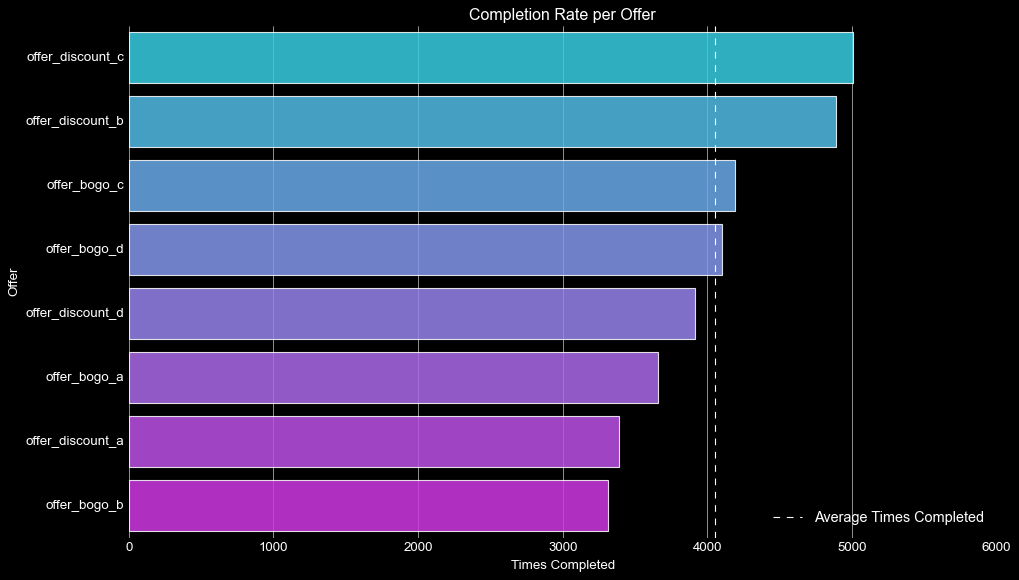

In [127]:
plot_init()
plt.title("Completion Rate per Offer")
sns.barplot(y="offer_name",x="count_completed",data=portfolio.merge(compcount).sort_values("count_completed", ascending=False), palette="cool",
           alpha=.85)
plt.ylabel("Offer")
plt.xlabel("Times Completed")
plt.axvline(np.mean(portfolio.merge(compcount).sort_values("count_completed", ascending=False)["count_completed"]), linestyle="--", label="Average Times Completed")
plt.legend(loc=4, fontsize=13)

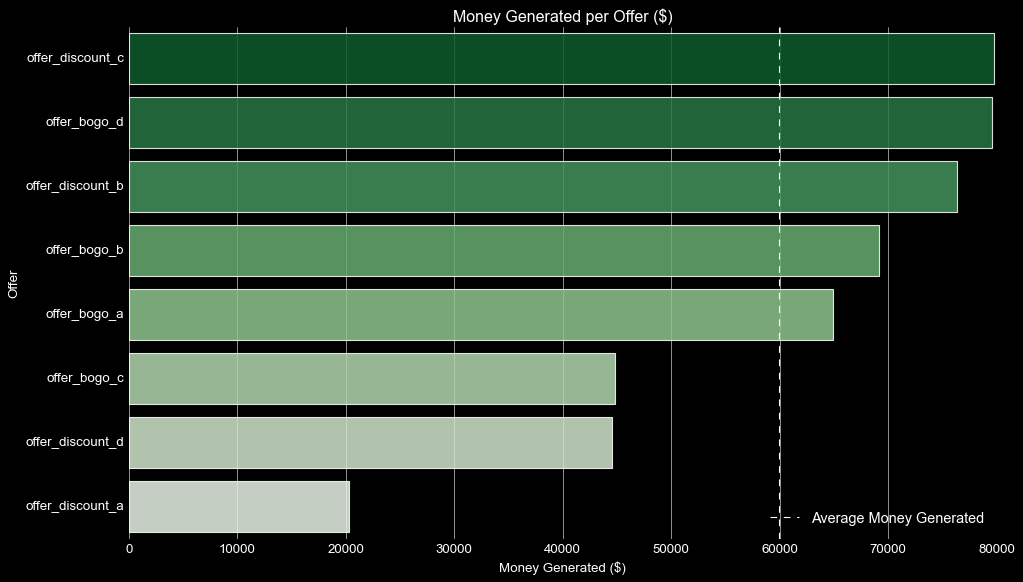

In [129]:
class_trans_dependent_merged["transaction_value"] = class_trans_dependent_merged["transaction_value"].astype("float64")

money_generated_by_offer = class_trans_dependent_merged.groupby("offer_id")["transaction_value"].sum().reset_index().sort_values("transaction_value",ascending=False)

money_generated_by_offer = money_generated_by_offer.merge(portfolio[["offer_id","offer_name"]])
money_generated_by_offer.rename(columns={"transaction_value":"gross_total_transactions"}, inplace=True)

plot_init()
plt.title("Money Generated per Offer ($)")
sns.barplot(y="offer_name",x="gross_total_transactions",data=money_generated_by_offer, palette="Greens_r",
           alpha=.85)
plt.ylabel("Offer")
plt.xlabel("Money Generated ($)")
plt.axvline(np.mean(money_generated_by_offer["gross_total_transactions"]), linestyle="--", label="Average Money Generated")
plt.legend(loc=4, fontsize=13)

<AxesSubplot:title={'center':'Transactions per Offer'}, xlabel='offer_name', ylabel='log_transaction'>

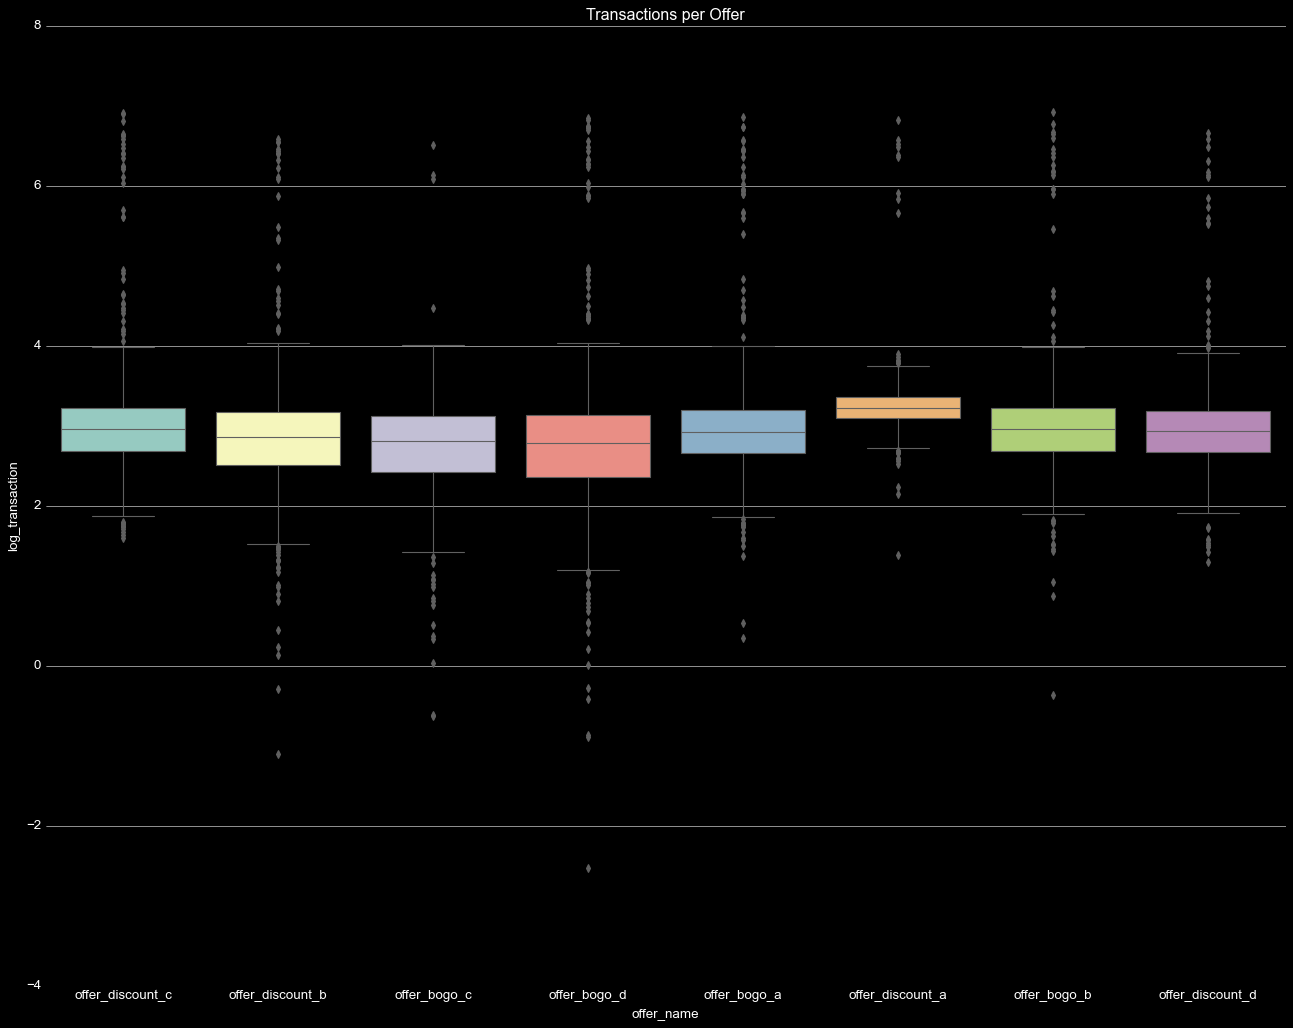

In [130]:
mm = trans_to_use[trans_to_use.offer_id!=np.nan].merge(portfolio)
mm['log_transaction'] = np.log(mm['transaction_value'].astype('float'))
plt.figure(figsize=(20,15))
plt.title('Transactions per Offer')
sns.boxplot(x='offer_name', y='log_transaction', data=mm)

<AxesSubplot:title={'center':'Transactions per Offer'}, xlabel='log_transaction', ylabel='offer_name'>

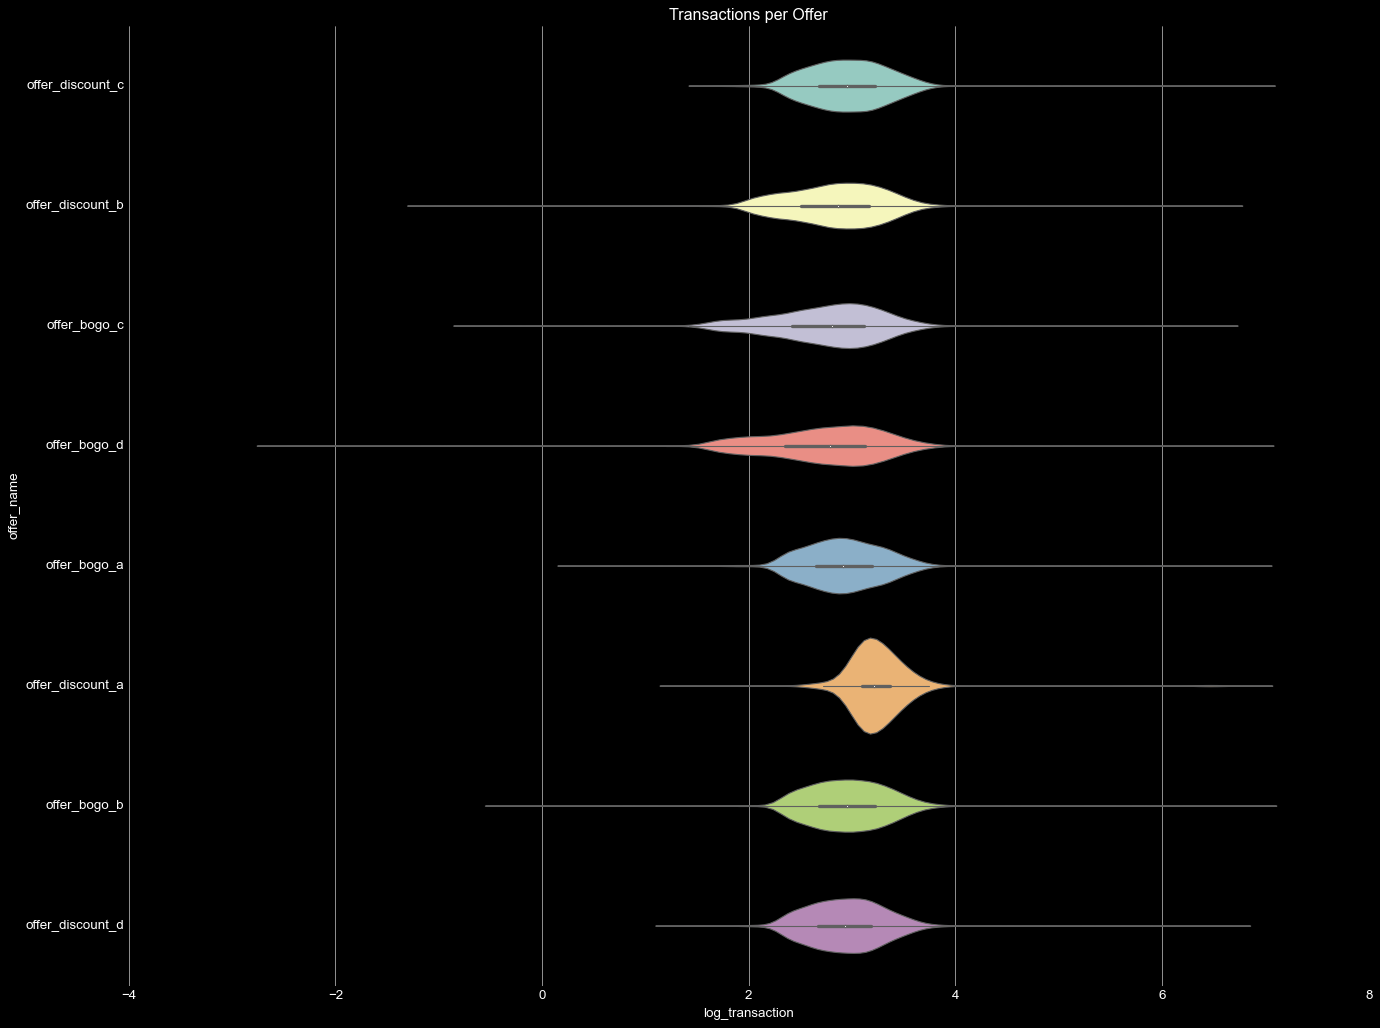

In [131]:
mm = trans_to_use[trans_to_use.offer_id!=np.nan].merge(portfolio)
mm['log_transaction'] = np.log(mm['transaction_value'].astype('float'))
plt.figure(figsize=(20,15))
plt.title('Transactions per Offer')
sns.violinplot(y='offer_name', x='log_transaction', data=mm)